In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import graphviz 
from seaborn import load_dataset
from scipy.cluster.hierarchy import dendrogram, linkage

from feature_selector import FeatureSelector 
#import vlc
# Configuración warnings
# Warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ------------------------------------------------------------------------------

import seaborn as sns
#print(df.shape)

import pathlib
print('Ruta actual de trabajo '+ str(pathlib.Path().absolute()))
np.random.seed(0)

Ruta actual de trabajo C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\Operaciones


#### Dataset  talleres
**ide_ope**: id operación
**nomopera**: nombre de la operación que se realiza en la reparación   
**aliasemp**: nombre del empleado que hizo la reparación   
**nomempresa**: Nombre de la empresa que repara el vehiculo que forma parte del grupo   
**taller_prove**: Nombre de la empresa externa que repara el vehiculo   
**v_codibud**: codigo del autobus   
**v_edad**: Edad del autobus   
**ndias_ant**: día desde la anterior reparación   
**capacidad**: capacidad dle vehiculo   
**marca**: Marca del vehiculo   
**modelo**: Modelo del vehiculo   
**potencia**: potencia dle vehiculo   
**tipo**: depende del  uso y el modelo del vehiculo   
**subtipo**: depende de la longitud y la capcidad dle vehiculo  
**dispositivo**: dispositivo recopilación datos telemetria
**subarea**: agrupación de operaciones relacionadas
**fechaope**: fecha de la operación
**fecha_ent**: fecha entrada en taller

In [2]:
pd.options.display.max_rows=60


pd.options.display.max_columns=50


In [3]:
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_Nant_560_480.csv',sep=';')
#df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_all_acc1.csv',sep=';')

df = pd.read_csv (r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\data\optaller_mix_560_480.csv',sep=';')
print(df.shape)
df

(12516, 33)


,id_ope,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fechaope,fecha_ent,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
0,71169,B116,13,ALEJANDRO,480 top,Aire acondicionado,Climatización,2016-09-09,2016-09-07,10,129,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
1,71170,B116,13,ALEJANDRO,480 top,Cambio o limpieza prefiltro gasoil,Gasoil,2016-09-09,2016-09-07,10,4905,355.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
2,71171,B116,13,ALEJANDRO,480 top,Compresor a.a,Climatización,2016-09-09,2016-09-07,10,235,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
3,71172,B116,13,ALEJANDRO,480 top,Valvulas a.a,Climatización,2016-09-09,2016-09-07,10,4905,127.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,70.31,30.00,NaN,NaN,NaN,0.0,0.0,126.00,NaN,NaN,NaN,NaN
4,72010,B116,13,GUILLERMO,480 top,Tapacubos,Ruedas,2016-09-29,2016-09-29,7,335,62.0,54,MAN,TOURING,12.00,13040.0,11967.0,301.0,Discrecional,Normal,2091.02,890.40,NaN,NaN,NaN,0.0,0.0,2455.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,165626,H099,12,BERMEJO,480 top,Retrovisor derecho,Carrocería,2021-09-21,2021-09-21,13,55,55.0,52,MAN,CITTOUR,12.85,12310.0,10518.0,228.0,Urbano,Normal,76208.76,30849.32,0.0,0.0,NaN,0.0,0.0,55597.00,0.00,NaN,NaN,NaN
12512,165627,H132,2,NaN,480 top,Fallo en AVS,Fallo en AVS,2021-09-22,2021-09-21,6,671,NaN,29,MERCEDES BENZ,DYPARRO,8.79,4960.0,2987.0,140.0,Discrecional,Microbus,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN
12513,165628,H109,14,ALEJANDRO,480 top,Aire acondicionado,Climatización,2021-09-21,2021-09-21,5,5,5.0,66,SCANIA,HABIT,10.58,10689.0,8867.0,169.0,Urbano,Midibus,177620.78,80422.08,0.0,0.0,NaN,0.0,0.0,202801.00,0.00,NaN,NaN,NaN
12514,165637,T340,3,NaN,560,Luces exteriores,Luces,2021-09-21,2021-09-21,21,1110,91.0,45,MAN,LION'S COACH L,13.90,15202.0,12419.0,338.0,Discrecional,Normal,126937.48,38326.00,16100.0,37149.0,5598.0,742821.0,742332.0,54426.36,104922.13,1371.36,31.375935,1.21


In [4]:
df.dtypes

id_ope                       int64
v_codigbus                  object
v_edad                       int64
aliasemp                    object
dispositivo                 object
nomopera                    object
subarea                     object
fechaope                    object
fecha_ent                   object
ndias_ant                    int64
ndias_ant_tipo               int64
ndias_ant_subarea          float64
capacidad                    int64
marca                       object
modelo                      object
longitud                   float64
tara                       float64
cilindrada                 float64
potencia                   float64
tipo                        object
subtipo                     object
sum(c.`distancia`)         float64
sum(c.`litros_totales`)    float64
sum(c.`frenazos`)          float64
sum(c.`exc_rpm`)           float64
sum(c.`exc_temp`)          float64
sum(c.`metros_asc`)        float64
sum(c.`metros_desc`)       float64
sum(c.`min_ral`)    

In [5]:
df=df[df['subtipo']=='Normal']

In [6]:
df['fechaope'] = pd.to_datetime(df['fechaope'])
df['fecha_ent'] = pd.to_datetime(df['fecha_ent'])

C:\Users\Dani\AppData\Local\Temp/ipykernel_5608/2938238695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fechaope'] = pd.to_datetime(df['fechaope'])


In [7]:
len(df.columns)

33

In [8]:
df.describe()

,id_ope,v_edad,ndias_ant,ndias_ant_tipo,ndias_ant_subarea,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`)
count,9591.000000,9591.000000,9591.000000,9591.000000,8787.000000,9591.000000,9591.000000,9591.000000,9591.000000,9591.000000,9591.000000,9591.000000,3780.000000,3780.000000,2003.000000,9.591000e+03,9.591000e+03,9591.000000,3695.000000,1918.000000,1918.000000,1918.000000
mean,123766.157648,10.788239,26.854968,904.687102,233.333902,52.894172,12.875764,13750.498697,11217.921489,297.851840,44481.628296,14457.158637,4492.459259,9682.991005,1762.426360,1.152880e+05,1.152965e+05,22181.322641,23638.789294,2568.537706,27.308343,1539.208415
std,30042.407414,4.244716,184.293487,1444.646611,340.207584,11.986635,0.778349,1258.493468,1351.484237,37.620841,59229.794617,32123.620179,9020.602299,15804.351895,5713.229578,3.264716e+05,3.267820e+05,29893.027710,45930.483100,6023.890510,16.230797,5320.767766
min,71169.000000,0.000000,-100.000000,-100.000000,1.000000,23.000000,12.000000,11018.000000,7698.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98033.500000,8.000000,5.000000,42.000000,29.000000,52.000000,12.200000,13012.000000,10518.000000,279.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.500000,0.000000,153.135000,22.256364,1.260000
50%,111536.000000,11.000000,10.000000,279.000000,101.000000,55.000000,12.850000,13495.000000,11705.000000,309.000000,21578.240000,6103.470000,4.000000,136.000000,155.000000,0.000000e+00,0.000000e+00,10027.000000,0.000000,806.595000,29.033768,10.895000
75%,156307.500000,14.000000,20.000000,1023.000000,288.500000,55.000000,12.930000,13876.000000,12316.000000,324.000000,67448.410000,21543.500000,5267.000000,14737.000000,982.500000,0.000000e+00,0.000000e+00,32156.500000,32110.970000,1821.582500,36.743642,287.430000
max,165640.000000,20.000000,6166.000000,7043.000000,3814.000000,103.000000,15.000000,19050.000000,12902.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,220381.000000,415635.340000,36108.490000,98.294243,40038.900000


In [9]:
df.columns

Index(['id_ope', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fechaope', 'fecha_ent', 'ndias_ant', 'ndias_ant_tipo',
       'ndias_ant_subarea', 'capacidad', 'marca', 'modelo', 'longitud', 'tara',
       'cilindrada', 'potencia', 'tipo', 'subtipo', 'sum(c.`distancia`)',
       'sum(c.`litros_totales`)', 'sum(c.`frenazos`)', 'sum(c.`exc_rpm`)',
       'sum(c.`exc_temp`)', 'sum(c.`metros_asc`)', 'sum(c.`metros_desc`)',
       'sum(c.`min_ral`)', 'sum(c.`acel_bruscas`)', 'sum(c.`decel_bruscas`)',
       'AVG(c.`inercia`)', 'sum(c.`kickdown`)'],
      dtype='object')

In [10]:
df = df.drop('id_ope', 1)
df = df.drop('fechaope', 1)
#df = df.drop('f_inicio', 1)
df = df.drop('ndias_ant', 1)
df = df.drop('ndias_ant_tipo', 1)
df = df.drop('ndias_ant_subarea', 1)
len(df.columns)

C:\Users\Dani\AppData\Local\Temp/ipykernel_5608/2824897489.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('id_ope', 1)


28

In [11]:
df=df.sort_values(['fecha_ent','v_codigbus'])

df.head(50)
df = df.reset_index(drop=True)

In [12]:
df['fecha_ant']=(df.groupby(['v_codigbus'])['fecha_ent'].shift(1))#- df['fechaope']).shift(-1)
df['dias'] =  (df['fecha_ent'] - df['fecha_ant']).dt.days

df=df.sort_values(['v_codigbus','fecha_ent'])
df.reset_index(inplace=True)
df['match'] = df.v_codigbus.eq(df.v_codigbus.shift())

df['dias_ant'] = np.where(((df['dias']==0)&(df['match']==True)),df['dias'].replace(to_replace=0, method='ffill').values,df['dias'])
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant
0,7822,58HC,16,TONI,480 top,INTERIOR VEHÍCULO,Interior,2021-04-15,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN
1,8069,58HC,16,ADRIAN,480 top,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0
2,8070,58HC,16,YEVHEN,480 top,INTERIOR VEHÍCULO,Interior,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0
3,8682,58HC,16,,480 top,PARAGOLPES DELANTERO,Carrocería,2021-06-17,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0
4,8858,58HC,16,,480 top,INTERIOR VEHÍCULO,Interior,2021-07-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9571,X117,7,ALEJANDRO,560,Instalaciones electricas,Sistema eléctrico,2021-09-17,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,35251.16,12454.00,2250.0,9000.0,126.0,232678.0,227255.0,19617.14,11556.86,383.58,35.235144,6.96,2021-07-30,49.0,True,49.0
9587,7116,X119,5,RODRIGUEZ,480 top,Instalaciones electricas,Sistema eléctrico,2021-02-01,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN
9588,7277,X119,5,BERMEJO,480 top,Fuga de aire,Fuga de aire,2021-02-19,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0
9589,8969,X119,5,NaN,480 top,Instalaciones electricas,Sistema eléctrico,2021-07-13,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0


In [13]:
df['subarea_ant']=(df.groupby(['v_codigbus'])['subarea'].shift(1))


In [14]:
df.describe()

,index,v_edad,capacidad,longitud,tara,cilindrada,potencia,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),dias,dias_ant
count,9591.00000,9591.000000,9591.000000,9591.000000,9591.000000,9591.000000,9591.000000,9591.000000,9591.000000,3780.000000,3780.000000,2003.000000,9.591000e+03,9.591000e+03,9591.000000,3695.000000,1918.000000,1918.000000,1918.000000,9415.000000,9334.000000
mean,4795.00000,10.788239,52.894172,12.875764,13750.498697,11217.921489,297.851840,44481.628296,14457.158637,4492.459259,9682.991005,1762.426360,1.152880e+05,1.152965e+05,22181.322641,23638.789294,2568.537706,27.308343,1539.208415,17.944344,27.011571
std,2768.82755,4.244716,11.986635,0.778349,1258.493468,1351.484237,37.620841,59229.794617,32123.620179,9020.602299,15804.351895,5713.229578,3.264716e+05,3.267820e+05,29893.027710,45930.483100,6023.890510,16.230797,5320.767766,44.632023,51.870323
min,0.00000,0.000000,23.000000,12.000000,11018.000000,7698.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2397.50000,8.000000,52.000000,12.200000,13012.000000,10518.000000,279.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.500000,0.000000,153.135000,22.256364,1.260000,0.000000,6.000000
50%,4795.00000,11.000000,55.000000,12.850000,13495.000000,11705.000000,309.000000,21578.240000,6103.470000,4.000000,136.000000,155.000000,0.000000e+00,0.000000e+00,10027.000000,0.000000,806.595000,29.033768,10.895000,6.000000,13.000000
75%,7192.50000,14.000000,55.000000,12.930000,13876.000000,12316.000000,324.000000,67448.410000,21543.500000,5267.000000,14737.000000,982.500000,0.000000e+00,0.000000e+00,32156.500000,32110.970000,1821.582500,36.743642,287.430000,18.000000,27.000000
max,9590.00000,20.000000,103.000000,15.000000,19050.000000,12902.000000,360.000000,449493.380000,998849.000000,83715.000000,96379.000000,54247.000000,3.756961e+06,3.755883e+06,220381.000000,415635.340000,36108.490000,98.294243,40038.900000,959.000000,959.000000


In [15]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant
0,7822,58HC,16,TONI,480 top,INTERIOR VEHÍCULO,Interior,2021-04-15,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN
1,8069,58HC,16,ADRIAN,480 top,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0,Interior
2,8070,58HC,16,YEVHEN,480 top,INTERIOR VEHÍCULO,Interior,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0,ABS/EBS
3,8682,58HC,16,,480 top,PARAGOLPES DELANTERO,Carrocería,2021-06-17,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0,Interior
4,8858,58HC,16,,480 top,INTERIOR VEHÍCULO,Interior,2021-07-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0,Carrocería
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9571,X117,7,ALEJANDRO,560,Instalaciones electricas,Sistema eléctrico,2021-09-17,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,35251.16,12454.00,2250.0,9000.0,126.0,232678.0,227255.0,19617.14,11556.86,383.58,35.235144,6.96,2021-07-30,49.0,True,49.0,Luces
9587,7116,X119,5,RODRIGUEZ,480 top,Instalaciones electricas,Sistema eléctrico,2021-02-01,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN
9588,7277,X119,5,BERMEJO,480 top,Fuga de aire,Fuga de aire,2021-02-19,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0,Sistema eléctrico
9589,8969,X119,5,NaN,480 top,Instalaciones electricas,Sistema eléctrico,2021-07-13,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0,Fuga de aire


In [16]:
to_show=['fecha_ant','fecha_ent','dias','dias_ant','v_codigbus','subarea', 'subarea_ant','v_edad']
df[to_show].head(50)

,fecha_ant,fecha_ent,dias,dias_ant,v_codigbus,subarea,subarea_ant,v_edad
0,NaT,2021-04-15,NaN,NaN,58HC,Interior,NaN,16
1,2021-04-15,2021-05-05,20.0,20.0,58HC,ABS/EBS,Interior,16
2,2021-05-05,2021-05-05,0.0,20.0,58HC,Interior,ABS/EBS,16
3,2021-05-05,2021-06-17,43.0,43.0,58HC,Carrocería,Interior,16
4,2021-06-17,2021-07-05,18.0,18.0,58HC,Interior,Carrocería,16
5,2021-07-05,2021-07-22,17.0,17.0,58HC,Interior,Interior,16
6,2021-07-22,2021-08-04,13.0,13.0,58HC,Fuelle,Interior,16
7,NaT,2021-02-12,NaN,NaN,61HC,Fuelle,NaN,15
8,2021-02-12,2021-02-12,0.0,NaN,61HC,Sistema de transmisión,Fuelle,15
9,2021-02-12,2021-02-12,0.0,NaN,61HC,Motor,Sistema de transmisión,15


In [17]:
#df['dias'] = df['dias'].astype(int)
df.dtypes

index                               int64
v_codigbus                         object
v_edad                              int64
aliasemp                           object
dispositivo                        object
nomopera                           object
subarea                            object
fecha_ent                  datetime64[ns]
capacidad                           int64
marca                              object
modelo                             object
longitud                          float64
tara                              float64
cilindrada                        float64
potencia                          float64
tipo                               object
subtipo                            object
sum(c.`distancia`)                float64
sum(c.`litros_totales`)           float64
sum(c.`frenazos`)                 float64
sum(c.`exc_rpm`)                  float64
sum(c.`exc_temp`)                 float64
sum(c.`metros_asc`)               float64
sum(c.`metros_desc`)              

In [18]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,v_codigbus,subarea,subarea_ant,v_edad
5046,NaT,2019-04-20,NaN,NaN,H114,Sistema eléctrico,NaN,5
5047,2019-04-20,2019-05-15,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
5048,2019-05-15,2019-05-15,0.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
5049,2019-05-15,2019-05-15,0.0,25.0,H114,Motor,Sistema eléctrico,5
5050,2019-05-15,2019-05-22,7.0,7.0,H114,Sistema eléctrico,Motor,5
5051,2019-05-22,2019-05-30,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
5052,2019-05-30,2019-06-25,26.0,26.0,H114,Carrocería,Sistema eléctrico,5
5053,2019-06-25,2019-06-25,0.0,26.0,H114,Carrocería,Carrocería,5
5054,2019-06-25,2019-06-28,3.0,3.0,H114,Carrocería,Carrocería,5
5055,2019-06-28,2019-10-25,119.0,119.0,H114,Motor,Carrocería,5


In [22]:
#df.loc[(df['dias_ant']>3000), to_show].sort_values('fecha_ent')

In [23]:
df.loc[(df.v_codigbus=='G084'), to_show].sort_index().head(50)

,fecha_ant,fecha_ent,dias,dias_ant,v_codigbus,subarea,subarea_ant,v_edad
3843,NaT,2020-10-02,NaN,NaN,G084,Lunas,NaN,3
3844,2020-10-02,2020-11-19,48.0,48.0,G084,Lunas,Lunas,3
3845,2020-11-19,2021-03-17,118.0,118.0,G084,Motor,Lunas,4
3846,2021-03-17,2021-03-17,0.0,118.0,G084,Adblue,Motor,4
3847,2021-03-17,2021-03-31,14.0,14.0,G084,Adblue,Adblue,4
3848,2021-03-31,2021-06-08,69.0,69.0,G084,Sistema de escape,Adblue,4
3849,2021-06-08,2021-08-20,73.0,73.0,G084,Pinchazo,Sistema de escape,4


In [24]:
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(50)

,fecha_ant,fecha_ent,dias,dias_ant,v_codigbus,subarea,subarea_ant,v_edad
5046,NaT,2019-04-20,NaN,NaN,H114,Sistema eléctrico,NaN,5
5047,2019-04-20,2019-05-15,25.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
5048,2019-05-15,2019-05-15,0.0,25.0,H114,Sistema eléctrico,Sistema eléctrico,5
5049,2019-05-15,2019-05-15,0.0,25.0,H114,Motor,Sistema eléctrico,5
5050,2019-05-15,2019-05-22,7.0,7.0,H114,Sistema eléctrico,Motor,5
5051,2019-05-22,2019-05-30,8.0,8.0,H114,Sistema eléctrico,Sistema eléctrico,5
5052,2019-05-30,2019-06-25,26.0,26.0,H114,Carrocería,Sistema eléctrico,5
5053,2019-06-25,2019-06-25,0.0,26.0,H114,Carrocería,Carrocería,5
5054,2019-06-25,2019-06-28,3.0,3.0,H114,Carrocería,Carrocería,5
5055,2019-06-28,2019-10-25,119.0,119.0,H114,Motor,Carrocería,5


In [25]:
df['aliasemp'] = df['aliasemp'].fillna('Sin asignar')
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('IKAÑI')),'IÑAKI',df['aliasemp'])
df['aliasemp'] = np.where( (df['aliasemp'].str.contains('               ')),'Sin asignar',df['aliasemp'])

In [26]:
df['dispositivo'] = np.where((df['dispositivo'].str.contains('480 top'))
                           ,'480',df['dispositivo'])

In [27]:
df['aliasemp_ant']=(df.groupby(['v_codigbus'])['aliasemp'].shift(1))

In [28]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,7822,58HC,16,TONI,480,INTERIOR VEHÍCULO,Interior,2021-04-15,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
1,8069,58HC,16,ADRIAN,480,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0,Interior,TONI
2,8070,58HC,16,YEVHEN,480,INTERIOR VEHÍCULO,Interior,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0,ABS/EBS,ADRIAN
3,8682,58HC,16,Sin asignar,480,PARAGOLPES DELANTERO,Carrocería,2021-06-17,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0,Interior,YEVHEN
4,8858,58HC,16,Sin asignar,480,INTERIOR VEHÍCULO,Interior,2021-07-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0,Carrocería,Sin asignar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9571,X117,7,ALEJANDRO,560,Instalaciones electricas,Sistema eléctrico,2021-09-17,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,35251.16,12454.00,2250.0,9000.0,126.0,232678.0,227255.0,19617.14,11556.86,383.58,35.235144,6.96,2021-07-30,49.0,True,49.0,Luces,BERMEJO
9587,7116,X119,5,RODRIGUEZ,480,Instalaciones electricas,Sistema eléctrico,2021-02-01,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
9588,7277,X119,5,BERMEJO,480,Fuga de aire,Fuga de aire,2021-02-19,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0,Sistema eléctrico,RODRIGUEZ
9589,8969,X119,5,Sin asignar,480,Instalaciones electricas,Sistema eléctrico,2021-07-13,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0,Fuga de aire,BERMEJO


In [29]:
df['dispositivo'].value_counts()

480    7624
560    1967
Name: dispositivo, dtype: int64

In [30]:
df['subarea'].value_counts()

Interior                              1035
Motor                                 1033
Climatización                          997
Puertas                                870
Ruedas                                 545
Sistema de refrigeración               544
Sistema eléctrico                      502
Carrocería                             481
Luces                                  434
Sistema de frenado                     415
Lunas                                  395
Fuga de aire                           333
Sistema de transmisión                 287
Fuelle                                 252
Sistema de dirección                   190
Alternador                             184
Gasoil                                 172
Correas                                134
Bateria                                126
Sistema de amortiguación               126
Reglaje válvulas                       102
Pinchazo                                96
Sistema de escape                       69
Fallo en AV

Observaciones: 9591
Atributos: 35


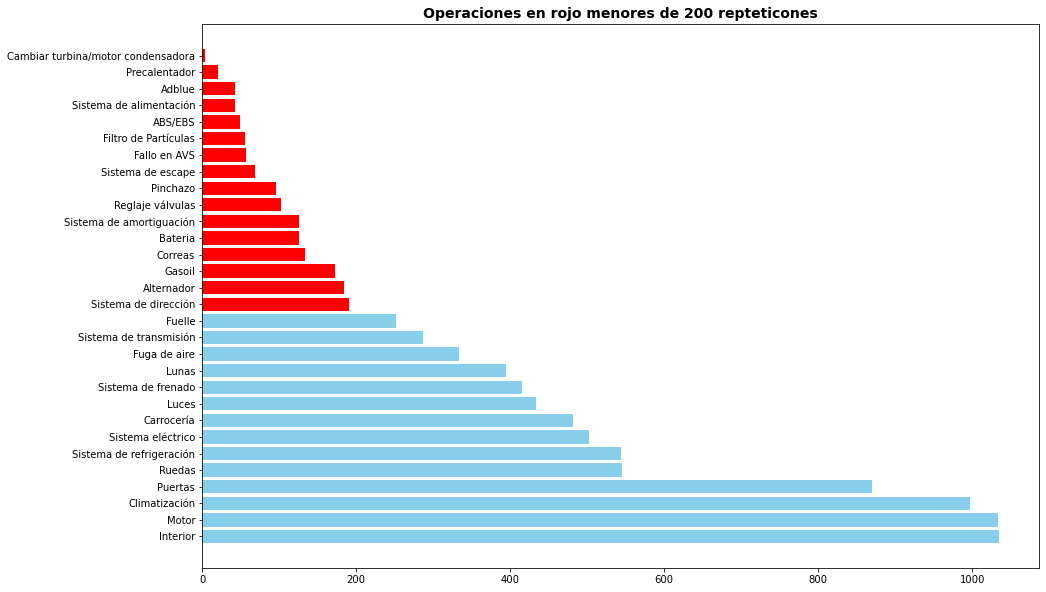

In [31]:
plt.figure(figsize=(15,10))
limite=200

x=df['subarea'].value_counts().index
y=df['subarea'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Operaciones en rojo menores de %d repteticones" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

print('Observaciones: '+str(df.shape[0])+'\n'+ 'Atributos: '+str(df.shape[1]))


In [32]:
df

,index,v_codigbus,v_edad,aliasemp,dispositivo,nomopera,subarea,fecha_ent,capacidad,marca,modelo,longitud,tara,cilindrada,potencia,tipo,subtipo,sum(c.`distancia`),sum(c.`litros_totales`),sum(c.`frenazos`),sum(c.`exc_rpm`),sum(c.`exc_temp`),sum(c.`metros_asc`),sum(c.`metros_desc`),sum(c.`min_ral`),sum(c.`acel_bruscas`),sum(c.`decel_bruscas`),AVG(c.`inercia`),sum(c.`kickdown`),fecha_ant,dias,match,dias_ant,subarea_ant,aliasemp_ant
0,7822,58HC,16,TONI,480,INTERIOR VEHÍCULO,Interior,2021-04-15,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159239.31,53894.50,0.0,0.0,NaN,0.0,0.0,93004.95,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
1,8069,58HC,16,ADRIAN,480,FALLO EN ABS/EBS,ABS/EBS,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-04-15,20.0,True,20.0,Interior,TONI
2,8070,58HC,16,YEVHEN,480,INTERIOR VEHÍCULO,Interior,2021-05-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,159797.81,54141.15,0.0,0.0,NaN,0.0,0.0,94095.95,0.00,NaN,NaN,NaN,2021-05-05,0.0,True,20.0,ABS/EBS,ADRIAN
3,8682,58HC,16,Sin asignar,480,PARAGOLPES DELANTERO,Carrocería,2021-06-17,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,165204.18,56116.17,1.0,0.0,NaN,0.0,0.0,97503.95,2.00,NaN,NaN,NaN,2021-05-05,43.0,True,43.0,Interior,YEVHEN
4,8858,58HC,16,Sin asignar,480,INTERIOR VEHÍCULO,Interior,2021-07-05,54,MAN,Pb,12.92,13816.0,12816.0,338.0,Discrecional,Normal,169218.96,57532.84,1.0,0.0,NaN,0.0,0.0,99447.95,2.00,NaN,NaN,NaN,2021-06-17,18.0,True,18.0,Carrocería,Sin asignar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9571,X117,7,ALEJANDRO,560,Instalaciones electricas,Sistema eléctrico,2021-09-17,71,MAN,i6 15.37,14.98,17121.0,12419.0,353.0,Discrecional,Normal,35251.16,12454.00,2250.0,9000.0,126.0,232678.0,227255.0,19617.14,11556.86,383.58,35.235144,6.96,2021-07-30,49.0,True,49.0,Luces,BERMEJO
9587,7116,X119,5,RODRIGUEZ,480,Instalaciones electricas,Sistema eléctrico,2021-02-01,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaT,NaN,False,NaN,NaN,NaN
9588,7277,X119,5,BERMEJO,480,Fuga de aire,Fuga de aire,2021-02-19,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-01,18.0,True,18.0,Sistema eléctrico,RODRIGUEZ
9589,8969,X119,5,Sin asignar,480,Instalaciones electricas,Sistema eléctrico,2021-07-13,53,MAN,LION'S COACH,12.00,13240.0,12419.0,324.0,Discrecional,Normal,0.00,0.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00,NaN,NaN,NaN,2021-02-19,144.0,True,144.0,Fuga de aire,BERMEJO


In [33]:
df.columns

Index(['index', 'v_codigbus', 'v_edad', 'aliasemp', 'dispositivo', 'nomopera',
       'subarea', 'fecha_ent', 'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'sum(c.`distancia`)', 'sum(c.`litros_totales`)', 'sum(c.`frenazos`)',
       'sum(c.`exc_rpm`)', 'sum(c.`exc_temp`)', 'sum(c.`metros_asc`)',
       'sum(c.`metros_desc`)', 'sum(c.`min_ral`)', 'sum(c.`acel_bruscas`)',
       'sum(c.`decel_bruscas`)', 'AVG(c.`inercia`)', 'sum(c.`kickdown`)',
       'fecha_ant', 'dias', 'match', 'dias_ant', 'subarea_ant',
       'aliasemp_ant'],
      dtype='object')

In [34]:


features=['v_codigbus', 'v_edad', 'aliasemp','aliasemp_ant','dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'subarea','subarea_ant','dias_ant']

df=df[features]

In [35]:
round(df.isna().sum() * 100 / len(df),2)

v_codigbus      0.00
v_edad          0.00
aliasemp        0.00
aliasemp_ant    1.84
dispositivo     0.00
capacidad       0.00
marca           0.00
modelo          0.00
longitud        0.00
tara            0.00
cilindrada      0.00
potencia        0.00
tipo            0.97
subtipo         0.00
subarea         0.00
subarea_ant     1.84
dias_ant        2.68
dtype: float64

In [36]:
df=df.dropna()
df.reset_index(drop = True, inplace = True)

print('Columnas: '+str(df.shape[0])+'\nFilas: '+str(df.shape[1]))

Columnas: 9245
Filas: 17


to_show=['v_codigbus', 'v_edad', 'aliasemp','aliasemp_ant','dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud',
       'tara', 'cilindrada', 'potencia', 'tipo', 'subtipo',
       'subarea','subarea_ant','dias_ant','fecha_ent']
df.loc[(df.v_codigbus=='H114'), to_show].sort_values('fecha_ent').head(50)

In [37]:
df['dias_ant'] = df['dias_ant'].astype(np.int64)
df['capacidad'] = df['capacidad'].astype(np.int64)
df['potencia'] = df['potencia'].astype(np.int64)
#df['ndias_ant_subarea'] = df['ndias_ant_subarea'].astype(np.int64)
df.dtypes



v_codigbus       object
v_edad            int64
aliasemp         object
aliasemp_ant     object
dispositivo      object
capacidad         int64
marca            object
modelo           object
longitud        float64
tara            float64
cilindrada      float64
potencia          int64
tipo             object
subtipo          object
subarea          object
subarea_ant      object
dias_ant          int64
dtype: object

In [38]:
df['aliasemp'].value_counts().index

Index(['Sin asignar', 'BERMEJO', 'CARABAÑA', 'ALEJANDRO', 'RODRIGUEZ',
       'DEL REY', 'CESAR GOMEZ', 'SERAFIN', 'GUILLERMO', 'MIÑANA', 'FERNANDO',
       'JULIAN', 'FONT', 'RICARDO', 'LLORENTE', 'FELIX', 'ESTEVE', 'IÑAKI',
       'ALFONSO', 'SORIANO (ONT.)', 'MARTINEZ', 'ESCRIBANO', 'JAVI', 'RUFFINO',
       'ALBIACH', 'CAFFARENA', 'DAVID', 'JUAN ANTONIO', 'RUBEN', 'PAQUITO',
       'NAVARRO', 'SERGIO', 'LAZARO', 'ADRIAN', 'IVAN', 'GALVEZ', 'FRAN',
       'ARRESE', 'YEVHEN', 'MOYA', 'EFRAIN', 'MIGUEL AG', 'CALIXTO', 'TONI',
       'MARIA ISABEL', 'JUAN CARLOS', 'CESAR', 'SOLANA', 'FELIPE', 'JOAN'],
      dtype='object')

In [39]:
df['aliasemp'].value_counts()

Sin asignar       2311
BERMEJO            838
CARABAÑA           690
ALEJANDRO          633
RODRIGUEZ          591
DEL REY            454
CESAR GOMEZ        446
SERAFIN            373
GUILLERMO          269
MIÑANA             258
FERNANDO           250
JULIAN             228
FONT               216
RICARDO            216
LLORENTE           166
FELIX              159
ESTEVE             148
IÑAKI              139
ALFONSO            125
SORIANO (ONT.)     102
MARTINEZ            93
ESCRIBANO           79
JAVI                73
RUFFINO             66
ALBIACH             50
CAFFARENA           43
DAVID               35
JUAN ANTONIO        32
RUBEN               29
PAQUITO             27
NAVARRO             18
SERGIO              14
LAZARO              11
ADRIAN              11
IVAN                 8
GALVEZ               7
FRAN                 7
ARRESE               6
YEVHEN               4
MOYA                 4
EFRAIN               3
MIGUEL AG            2
CALIXTO              2
TONI       

<BarContainer object of 50 artists>

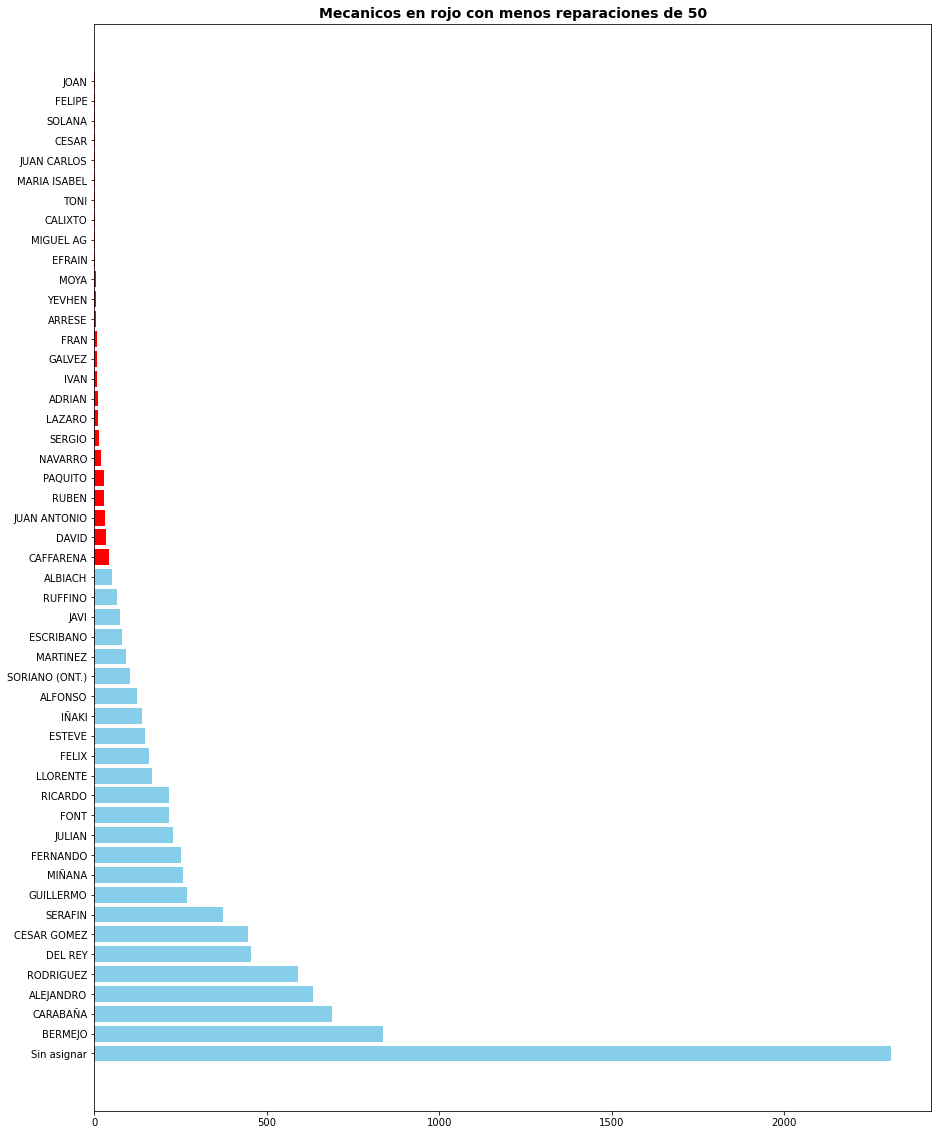

In [40]:
plt.figure(figsize=(15,20))
limite=50

x=df['aliasemp'].value_counts().index
y=df['aliasemp'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)
#alias.plot(kind='barh',color=my_color)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\aliasemp.png')

In [41]:
df.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant'],
      dtype='object')

In [42]:
df.dtypes

v_codigbus       object
v_edad            int64
aliasemp         object
aliasemp_ant     object
dispositivo      object
capacidad         int64
marca            object
modelo           object
longitud        float64
tara            float64
cilindrada      float64
potencia          int64
tipo             object
subtipo          object
subarea          object
subarea_ant      object
dias_ant          int64
dtype: object

In [43]:
target='dias ant'



In [44]:
df.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant'],
      dtype='object')

In [45]:
import category_encoders as ce
df_cat=df.select_dtypes(include=np.object)
cols_cat=df_cat.columns
encoder = ce.OrdinalEncoder(cols=['v_codigbus','dispositivo','aliasemp','aliasemp_ant', 'subarea','subarea_ant', 'marca','modelo','tipo','subtipo'])
df_enc = encoder.fit_transform(df_cat)
df_enc

,v_codigbus,aliasemp,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea,subarea_ant
0,1,1,1,1,1,1,1,1,1,1
1,1,2,2,1,1,1,1,1,2,2
2,1,3,3,1,1,1,1,1,3,1
3,1,3,4,1,1,1,1,1,2,3
4,1,3,4,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
9240,168,24,24,2,1,6,1,1,18,30
9241,168,5,24,2,1,6,1,1,20,9
9242,169,24,25,1,1,3,1,1,5,19
9243,169,3,24,1,1,3,1,1,20,5


In [46]:
df.columns

Index(['v_codigbus', 'v_edad', 'aliasemp', 'aliasemp_ant', 'dispositivo',
       'capacidad', 'marca', 'modelo', 'longitud', 'tara', 'cilindrada',
       'potencia', 'tipo', 'subtipo', 'subarea', 'subarea_ant', 'dias_ant'],
      dtype='object')

In [47]:
df_num=df.select_dtypes(include=np.number)
cols_num=df_num.drop(columns=['dias_ant']).columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num.drop(columns=['dias_ant']))
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)
scaled_df[['dias_ant']]=df_num[['dias_ant']]

df_num=df.select_dtypes(include=np.number)
cols_num=df_num.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num)
scaled_df = pd.DataFrame(scaled_df, columns=cols_num)
scaled_df['target']=df_num['ndias_ant']

In [48]:
df_num

,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant
0,16,54,12.92,13816.0,12816.0,338,20
1,16,54,12.92,13816.0,12816.0,338,20
2,16,54,12.92,13816.0,12816.0,338,43
3,16,54,12.92,13816.0,12816.0,338,18
4,16,54,12.92,13816.0,12816.0,338,17
...,...,...,...,...,...,...,...
9240,7,71,14.98,17121.0,12419.0,353,23
9241,7,71,14.98,17121.0,12419.0,353,49
9242,5,53,12.00,13240.0,12419.0,324,18
9243,5,53,12.00,13240.0,12419.0,324,144


In [49]:
scaled_df

,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant
0,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,20
1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,20
2,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,43
3,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,18
4,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,17
...,...,...,...,...,...,...,...
9240,-0.911739,1.516175,2.703993,2.676259,0.891708,1.469971,23
9241,-0.911739,1.516175,2.703993,2.676259,0.891708,1.469971,49
9242,-1.386347,0.019721,-1.117995,-0.398869,0.891708,0.701992,18
9243,-1.386347,0.019721,-1.117995,-0.398869,0.891708,0.701992,144


In [50]:
df_norm=pd.concat([df_enc, scaled_df], axis=1,)
df_norm.shape

(9245, 17)

In [51]:
df_norm

,v_codigbus,aliasemp,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea,subarea_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant
0,1,1,1,1,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,20
1,1,2,2,1,1,1,1,1,2,2,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,20
2,1,3,3,1,1,1,1,1,3,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,43
3,1,3,4,1,1,1,1,1,2,3,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,18
4,1,3,4,1,1,1,1,1,2,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,168,24,24,2,1,6,1,1,18,30,-0.911739,1.516175,2.703993,2.676259,0.891708,1.469971,23
9241,168,5,24,2,1,6,1,1,20,9,-0.911739,1.516175,2.703993,2.676259,0.891708,1.469971,49
9242,169,24,25,1,1,3,1,1,5,19,-1.386347,0.019721,-1.117995,-0.398869,0.891708,0.701992,18
9243,169,3,24,1,1,3,1,1,20,5,-1.386347,0.019721,-1.117995,-0.398869,0.891708,0.701992,144


(array([0]), [Text(0, 0, '0')])

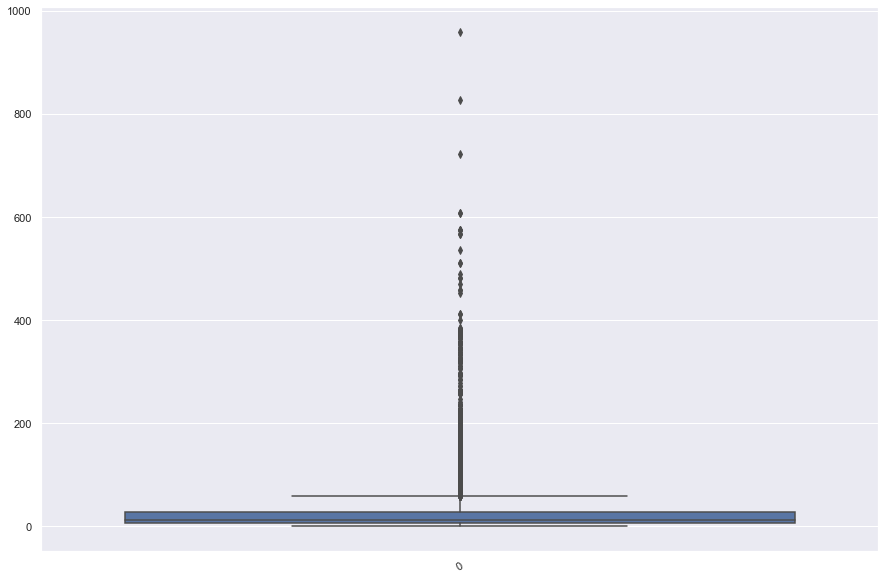

In [52]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df['dias_ant'])
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'v_codigbus'),
  Text(1, 0, 'aliasemp'),
  Text(2, 0, 'aliasemp_ant'),
  Text(3, 0, 'dispositivo'),
  Text(4, 0, 'marca'),
  Text(5, 0, 'modelo'),
  Text(6, 0, 'tipo'),
  Text(7, 0, 'subtipo'),
  Text(8, 0, 'subarea'),
  Text(9, 0, 'subarea_ant')])

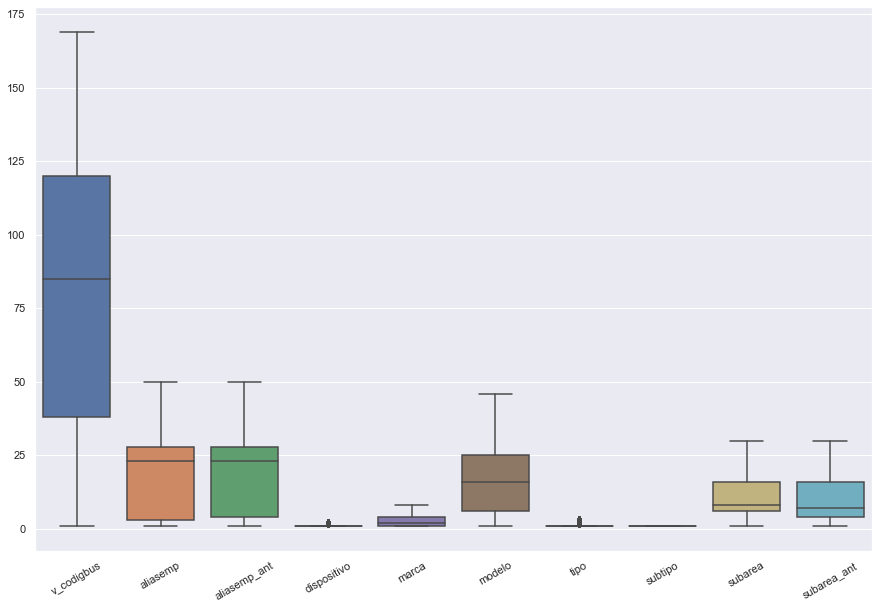

In [53]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=df_enc)
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'v_edad'),
  Text(1, 0, 'capacidad'),
  Text(2, 0, 'longitud'),
  Text(3, 0, 'tara'),
  Text(4, 0, 'cilindrada'),
  Text(5, 0, 'potencia')])

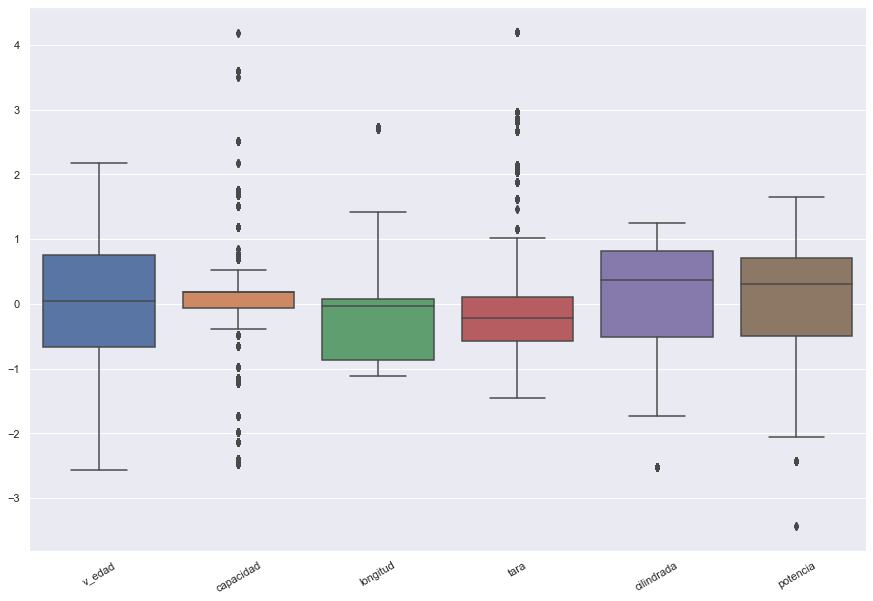

In [54]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.boxplot(data=scaled_df.drop(columns=['dias_ant']))
plt.xticks(rotation=30)

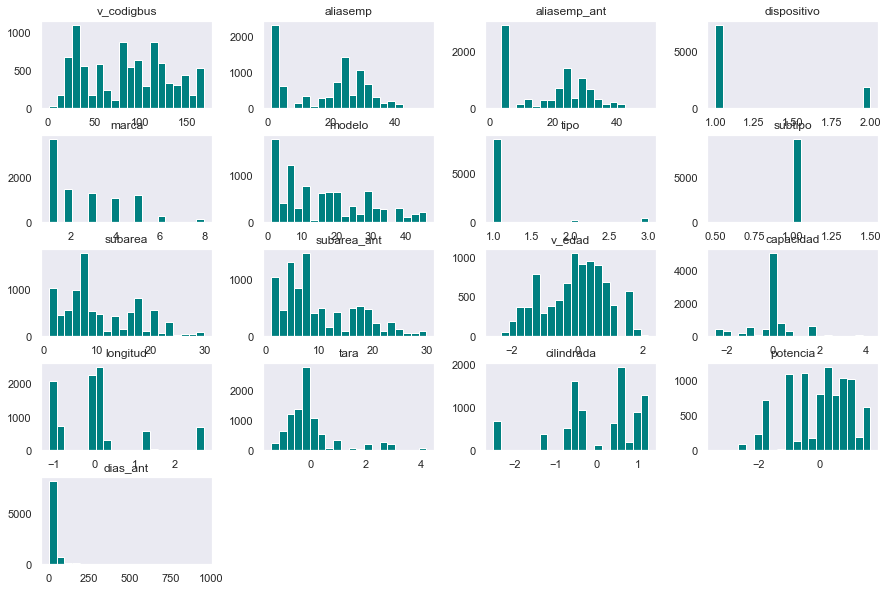

In [55]:
hist_mean= df_norm.hist(bins=20,figsize=(15,10),grid=False, color='teal')

In [56]:
df_subarea_ant = pd.DataFrame({'subarea_ant':pd.unique(df.subarea_ant), 'codigo':pd.unique(df_norm.subarea_ant)})

df_subarea_ant

,subarea_ant,codigo
0,Interior,1
1,ABS/EBS,2
2,Carrocería,3
3,Motor,4
4,Fuga de aire,5
5,Puertas,6
6,Climatización,7
7,Sistema de refrigeración,8
8,Luces,9
9,Sistema de amortiguación,10


In [57]:
df_v_codigbus = pd.DataFrame({'v_codigbus':pd.unique(df.v_codigbus), 'codigo':pd.unique(df_norm.v_codigbus)})
df_v_codigbus

,v_codigbus,codigo
0,58HC,1
1,61HC,2
2,63HC,3
3,67HC,4
4,69HC,5
...,...,...
164,X111,165
165,X114,166
166,X116,167
167,X117,168


In [58]:

df_aliasemp = pd.DataFrame({'aliasemp':pd.unique(df.aliasemp), 'codigo':pd.unique(df_norm.aliasemp)})
df_aliasemp

,aliasemp,codigo
0,ADRIAN,1
1,YEVHEN,2
2,Sin asignar,3
3,TONI,4
4,ALEJANDRO,5
5,IVAN,6
6,EFRAIN,7
7,CALIXTO,8
8,JUAN CARLOS,9
9,FELIX,10


In [59]:
df_marca = pd.DataFrame({'Marca':pd.unique(df.marca), 'codigo':pd.unique(df_norm.marca)})
df_marca 

,Marca,codigo
0,MAN,1
1,SCANIA,2
2,MERCEDES BENZ,3
3,VOLVO,4
4,IVECO,5
5,DAF,6
6,CUMMINS,7
7,RENAULT,8


In [60]:
df_modelo = pd.DataFrame({'modelo':pd.unique(df.modelo), 'codigo':pd.unique(df_norm.modelo)})
df_modelo 

,modelo,codigo
0,Pb,1
1,CENTURY,2
2,LION'S COACH,3
3,CELERIS,4
4,TOURISMO,5
5,i6 15.37,6
6,i6 13.37,7
7,DIVO,8
8,SIDERAL 2000,9
9,SIDERAL,10


In [61]:
df_tipo = pd.DataFrame({'tipo':pd.unique(df.tipo), 'codigo':pd.unique(df_norm.tipo)})
df_tipo 

,tipo,codigo
0,Discrecional,1
1,Interurbano,2
2,Urbano,3


In [62]:
df_subtipo = pd.DataFrame({'subtipo':pd.unique(df.subtipo), 'codigo':pd.unique(df_norm.subtipo)})
df_subtipo

,subtipo,codigo
0,Normal,1


In [63]:
df['subtipo'].value_counts()

Normal    9245
Name: subtipo, dtype: int64

<BarContainer object of 1 artists>

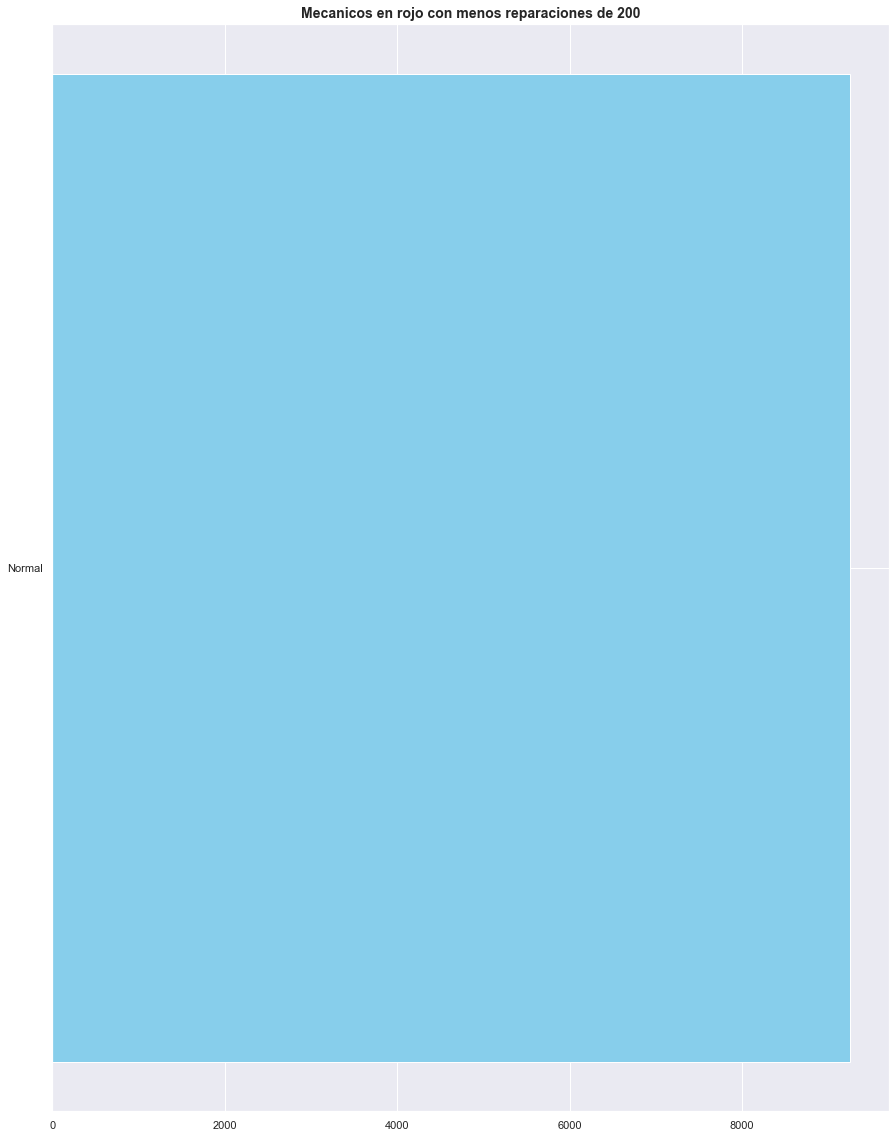

In [64]:
plt.figure(figsize=(15,20))
limite=200

x=df['subtipo'].value_counts().index
y=df['subtipo'].value_counts()
my_color = np.where(y>=limite, 'skyblue', 'red')
plt.title(("Mecanicos en rojo con menos reparaciones de %d" % limite),fontsize=14, fontweight='bold')
plt.barh(x, y,color=my_color)

In [65]:
df_norm=df_norm.drop(['subarea','aliasemp'],axis=1)

<AxesSubplot:>

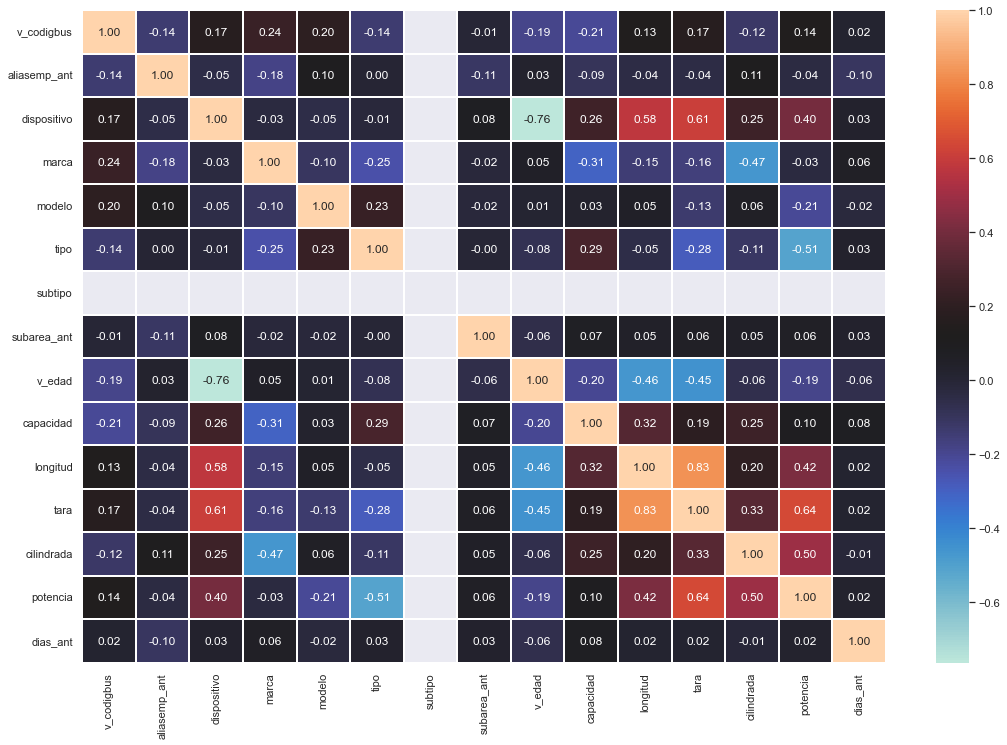

In [66]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(df_norm.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)

# Feature selector

In [67]:
df_norm

,v_codigbus,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia,dias_ant
0,1,1,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,20
1,1,2,1,1,1,1,1,2,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,20
2,1,3,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,43
3,1,4,1,1,1,1,1,3,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,18
4,1,4,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,168,24,2,1,6,1,1,30,-0.911739,1.516175,2.703993,2.676259,0.891708,1.469971,23
9241,168,24,2,1,6,1,1,9,-0.911739,1.516175,2.703993,2.676259,0.891708,1.469971,49
9242,169,25,1,1,3,1,1,19,-1.386347,0.019721,-1.117995,-0.398869,0.891708,0.701992,18
9243,169,24,1,1,3,1,1,5,-1.386347,0.019721,-1.117995,-0.398869,0.891708,0.701992,144


In [68]:
train_labels=df_norm['dias_ant']
train=df_norm.drop(columns = 'dias_ant')

In [69]:
fs = FeatureSelector(data = train, labels = train_labels)


In [70]:
train_labels

0        20
1        20
2        43
3        18
4        17
       ... 
9240     23
9241     49
9242     18
9243    144
9244     37
Name: dias_ant, Length: 9245, dtype: int64

## Missing Values

In [71]:

fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



In [72]:
missing_features = fs.ops['missing']
missing_features[:10]


[]

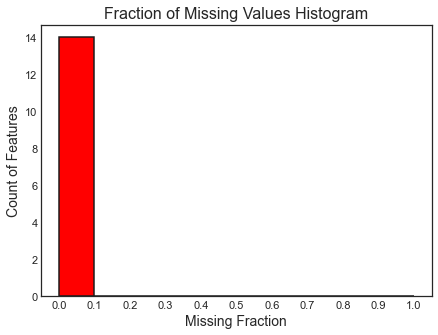

In [73]:
fs.plot_missing()

## Single Unique Value

In [74]:
fs.identify_single_unique()

1 features with a single unique value.



In [75]:
single_unique = fs.ops['single_unique']
single_unique

['subtipo']

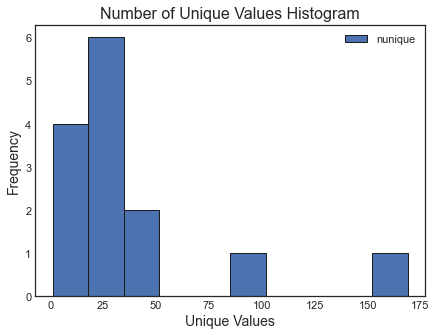

In [76]:
fs.plot_unique()

In [77]:
fs.unique_stats.sample(5)


,nunique
potencia,30
longitud,24
v_edad,21
aliasemp_ant,50
tipo,3


## Collinear (highly correlated) Features

In [78]:
fs.identify_collinear(correlation_threshold=0.80)

1 features with a correlation magnitude greater than 0.80.



In [79]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['tara']

(array([0.5]), [Text(0, 0.5, 'longitud')])

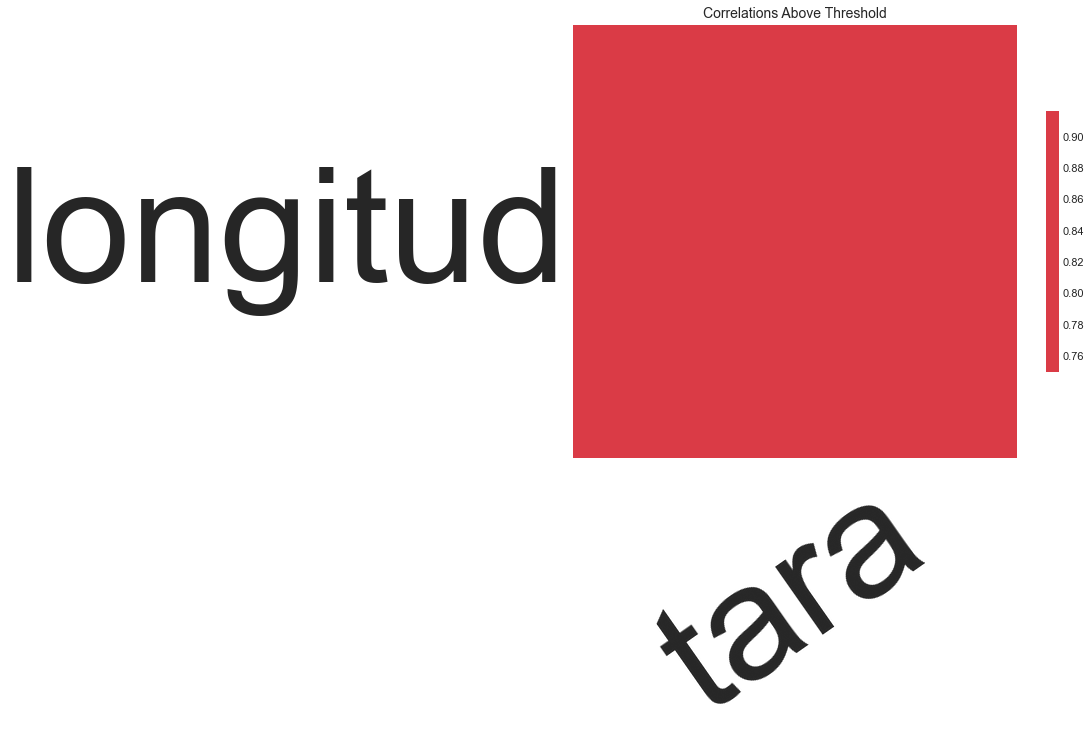

In [80]:
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)



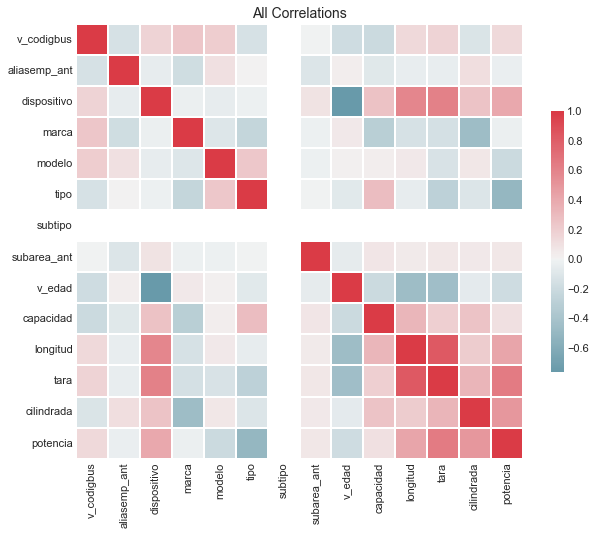

In [81]:
fs.plot_collinear(plot_all=True)

1 features with a correlation magnitude greater than 0.80.



(array([0.5]), [Text(0, 0.5, 'longitud')])

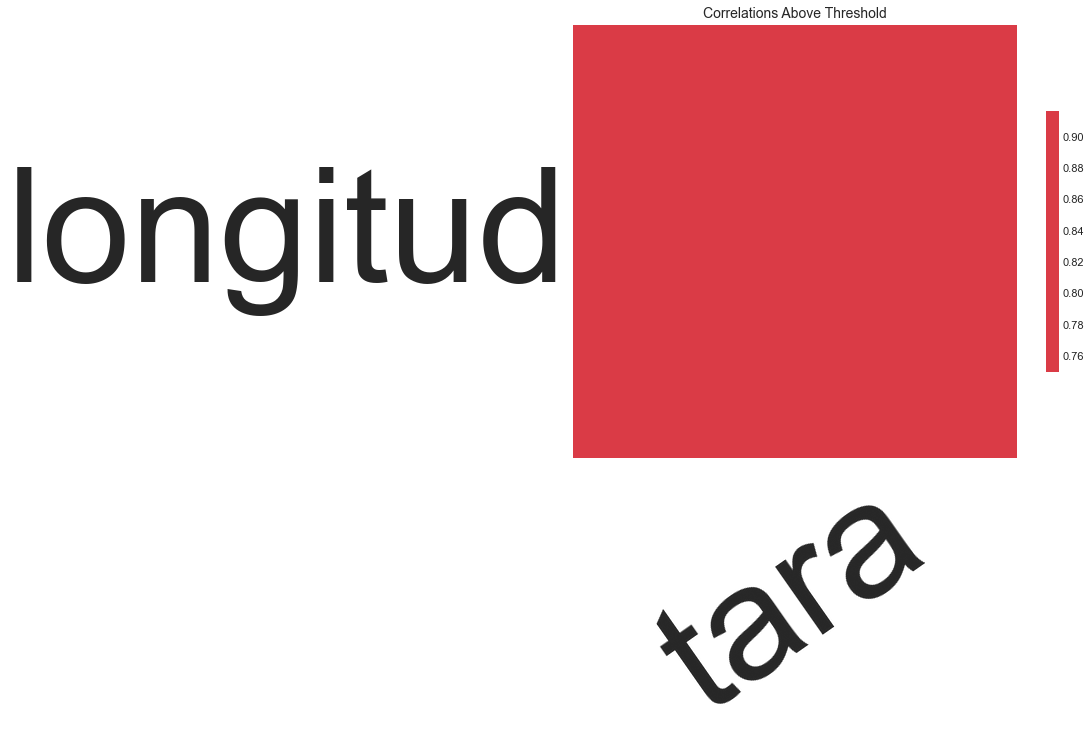

In [82]:
fs.identify_collinear(correlation_threshold=0.80)
fs.plot_collinear()
plt.xticks(rotation=35)
plt.yticks(rotation=0)

In [83]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,tara,longitud,0.832925


## Zero Importance Features

In [84]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = False)

Training Gradient Boosting Model


1 features with zero importance after one-hot encoding.



In [85]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))


There are 14 original features
There are 0 one-hot features


In [86]:
fs.data_all.head(10)

,v_codigbus,aliasemp_ant,dispositivo,marca,modelo,tipo,subtipo,subarea_ant,v_edad,capacidad,longitud,tara,cilindrada,potencia
0,1,1,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741
1,1,2,1,1,1,1,1,2,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741
2,1,3,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741
3,1,4,1,1,1,1,1,3,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741
4,1,4,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741
5,1,4,1,1,1,1,1,1,1.223995,0.102857,0.061948,0.057528,1.184061,1.072741
6,2,3,1,2,2,1,1,4,0.986691,0.185993,-1.117995,-0.611220,-0.418355,-0.463216
7,2,3,1,2,2,1,1,5,0.986691,0.185993,-1.117995,-0.611220,-0.418355,-0.463216
8,2,5,1,2,2,1,1,4,0.986691,0.185993,-1.117995,-0.611220,-0.418355,-0.463216
9,2,6,1,2,2,1,1,6,0.986691,0.185993,-1.117995,-0.611220,-0.418355,-0.463216


In [87]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

[]

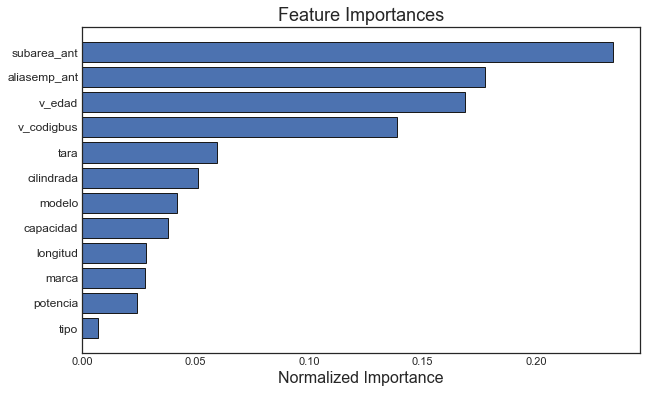

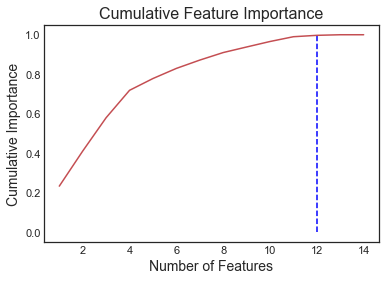

12 features required for 0.99 of cumulative importance


In [88]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [89]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,subarea_ant,7022.0,0.234067,0.234067
1,aliasemp_ant,5324.0,0.177467,0.411533
2,v_edad,5062.0,0.168733,0.580267
3,v_codigbus,4158.0,0.138600,0.718867
4,tara,1789.0,0.059633,0.778500
5,cilindrada,1536.0,0.051200,0.829700
6,modelo,1262.0,0.042067,0.871767
7,capacidad,1143.0,0.038100,0.909867
8,longitud,845.0,0.028167,0.938033
9,marca,833.0,0.027767,0.965800


In [90]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)


14

## Low Importance Features


In [91]:
fs.identify_low_importance(cumulative_importance = 0.99)

11 features required for cumulative importance of 0.99 after one hot encoding.
3 features do not contribute to cumulative importance of 0.99.



In [92]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['tipo', 'dispositivo', 'subtipo']

## Removing Features

In [93]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [94]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 1 features.


In [95]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 4 features identified for removal


[]

In [96]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 4 features.


## Handling One-Hot Features

In [97]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)


['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 4 features including one-hot features.


In [98]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 14
Final Number of Features:  10


In [99]:
train_removed_all

,v_codigbus,aliasemp_ant,marca,modelo,subarea_ant,v_edad,capacidad,longitud,cilindrada,potencia
0,1,1,1,1,1,1.223995,0.102857,0.061948,1.184061,1.072741
1,1,2,1,1,2,1.223995,0.102857,0.061948,1.184061,1.072741
2,1,3,1,1,1,1.223995,0.102857,0.061948,1.184061,1.072741
3,1,4,1,1,3,1.223995,0.102857,0.061948,1.184061,1.072741
4,1,4,1,1,1,1.223995,0.102857,0.061948,1.184061,1.072741
...,...,...,...,...,...,...,...,...,...,...
9240,168,24,1,6,30,-0.911739,1.516175,2.703993,0.891708,1.469971
9241,168,24,1,6,9,-0.911739,1.516175,2.703993,0.891708,1.469971
9242,169,25,1,3,19,-1.386347,0.019721,-1.117995,0.891708,0.701992
9243,169,24,1,3,5,-1.386347,0.019721,-1.117995,0.891708,0.701992


### Analisis de componentes principales

features_t1=['v_codigbus', 'aliasemp_ant', 'dispositivo', 'marca',
       'modelo', 'tipo', 'subtipo', 'subarea_ant', 'v_edad',
       'capacidad', 'longitud', 'tara', 'cilindrada', 'potencia', 'dias_ant',
       'ndias_ant_subarea']
df_norm=df_target1[features_t1]
df_norm.reset_index(drop = True, inplace = True)


In [100]:
df_feat = np.transpose(train_removed_all)
#df_feat=df_feat.drop('target', 0)
names =  df_feat.index
names

Index(['v_codigbus', 'aliasemp_ant', 'marca', 'modelo', 'subarea_ant',
       'v_edad', 'capacidad', 'longitud', 'cilindrada', 'potencia'],
      dtype='object')

In [101]:
len(names)

10

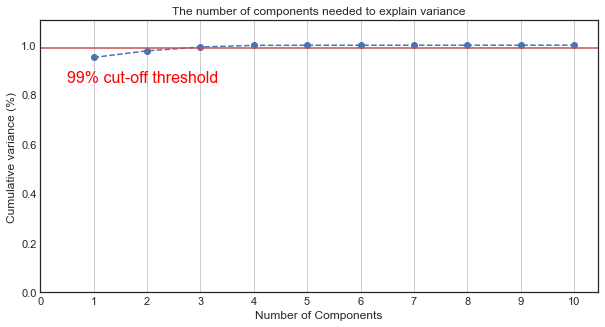

In [102]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_feat)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

Variance Ratio:  [0.85873588 0.0803393 ]


C:\Users\Dani\AppData\Local\Temp/ipykernel_5608/696053220.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


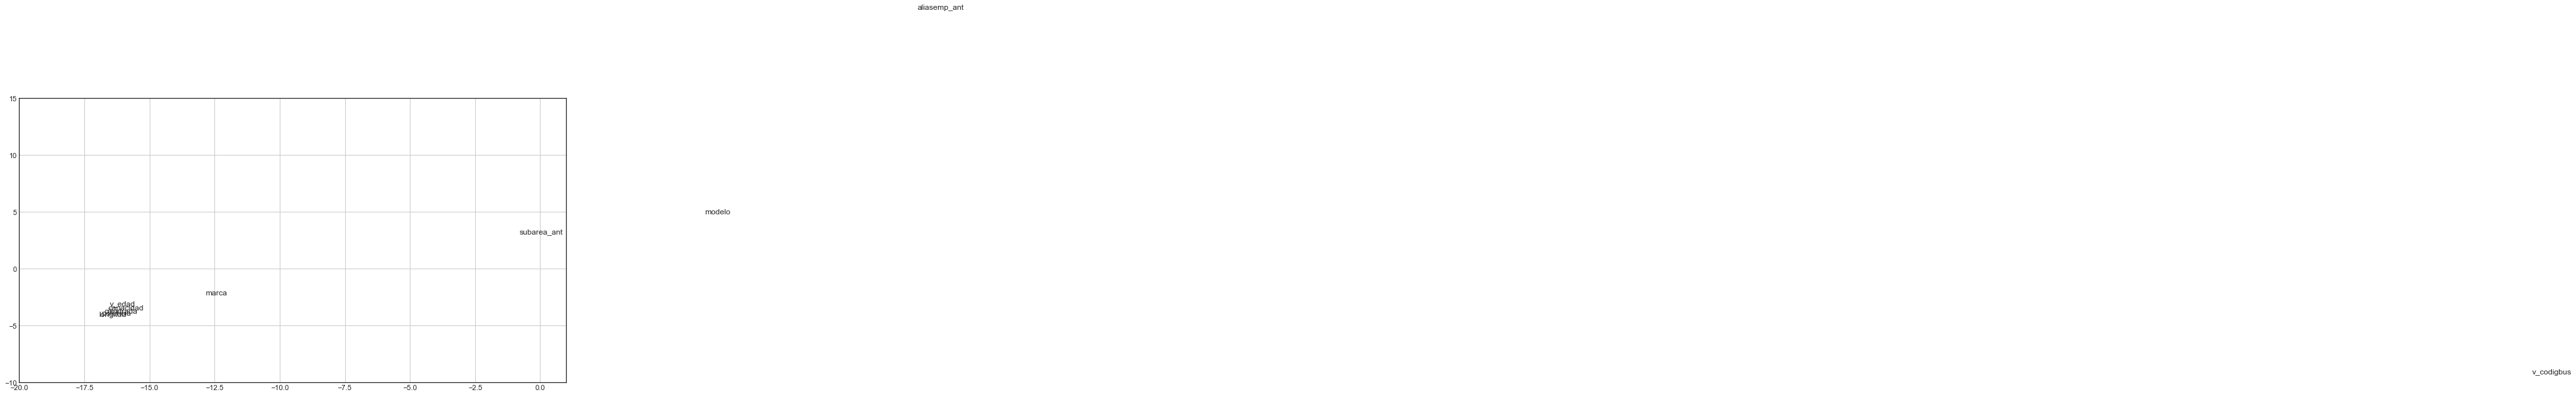

In [103]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components =2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-20, )
plt.ylim(-10, 15)
ax.grid(True)
fig.tight_layout()
plt.show()

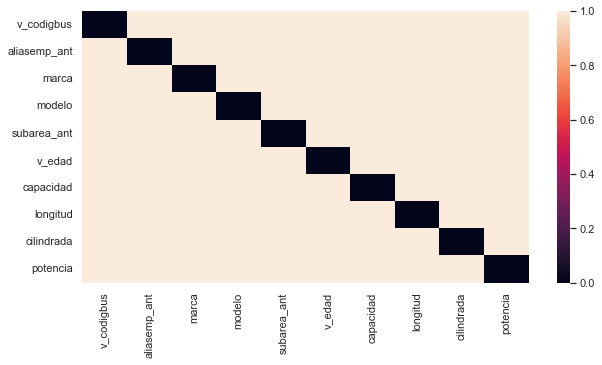

In [104]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)


# 3.1.1 Visualization
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

C:\Users\Dani\AppData\Local\Temp/ipykernel_5608/3741172497.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


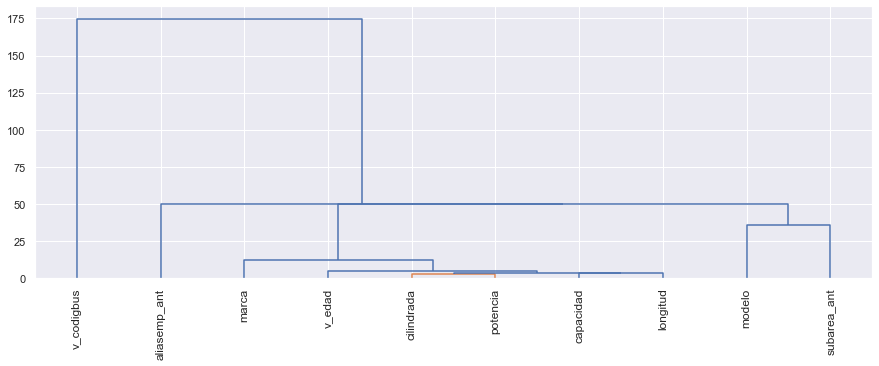

In [105]:


clusters = cluster.hierarchy.linkage(matdist, method = 'single')

plt.figure(figsize=(15,5))
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

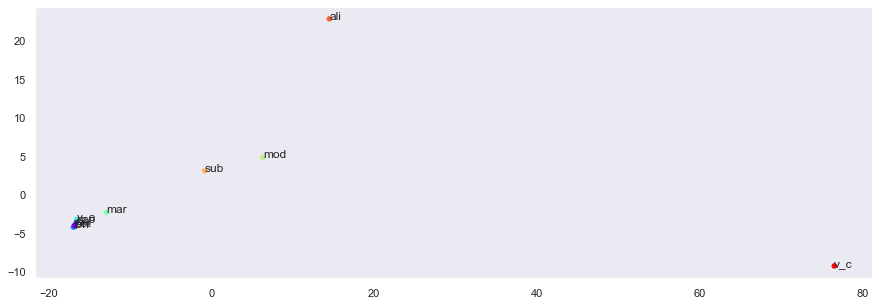

In [106]:
cut = 3 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
plt.figure(figsize=(15,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=20,cmap='rainbow')
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:3]) 


plt.grid()
plt.show()

In [107]:
df_norm.columns

Index(['v_codigbus', 'aliasemp_ant', 'dispositivo', 'marca', 'modelo', 'tipo',
       'subtipo', 'subarea_ant', 'v_edad', 'capacidad', 'longitud', 'tara',
       'cilindrada', 'potencia', 'dias_ant'],
      dtype='object')

# Reduccionde variables PCA

In [108]:
names = train_removed_all.columns
len(names)

10

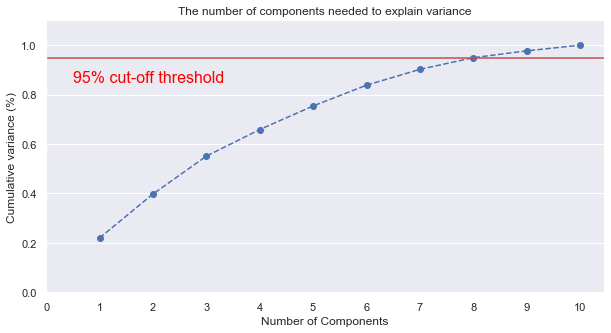

In [109]:
#names=df_norm['target']
#names2=df_norm['subtipo']

from sklearn.decomposition import PCA
min_max_scaler = preprocessing.MinMaxScaler()
#features_norm = min_max_scaler.fit_transform(df_norm.drop('target', 1))
features_norm = min_max_scaler.fit_transform(train_removed_all)
pca = PCA().fit(features_norm)
n=len(names)+1

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots(figsize=(10,5))
xi = np.arange(1, n, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, n, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')

plt.show()

In [110]:
#names=df_norm['target']
names2=df_norm['subtipo']

C:\Users\Dani\AppData\Local\Temp/ipykernel_5608/3186825267.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_norm = min_max_scaler.fit_transform(df_norm.drop('dias_ant', 1))


Variance Ratio: 


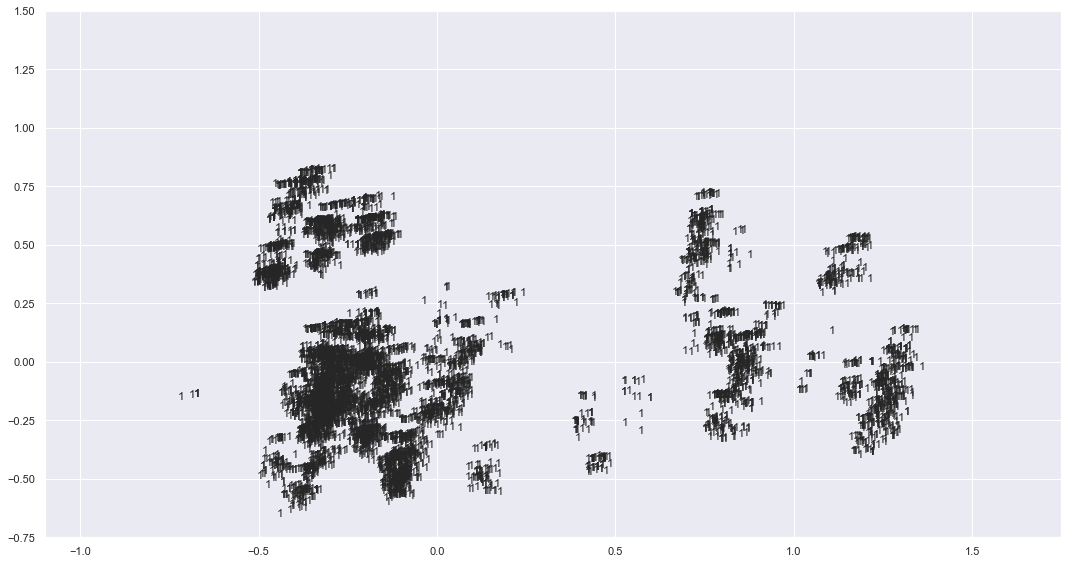

In [111]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_norm.drop('dias_ant', 1))



#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 9)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ")#, estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names2[i]) 


plt.xlim(-1.1, 1.75)
plt.ylim(-0.75, 1.5)
ax.grid(True)
fig.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3617612809647793
For n_clusters = 3 The average silhouette_score is : 0.22877357628127634
For n_clusters = 4 The average silhouette_score is : 0.2602460107137143
For n_clusters = 5 The average silhouette_score is : 0.23497974271567443
For n_clusters = 6 The average silhouette_score is : 0.23001657180023796


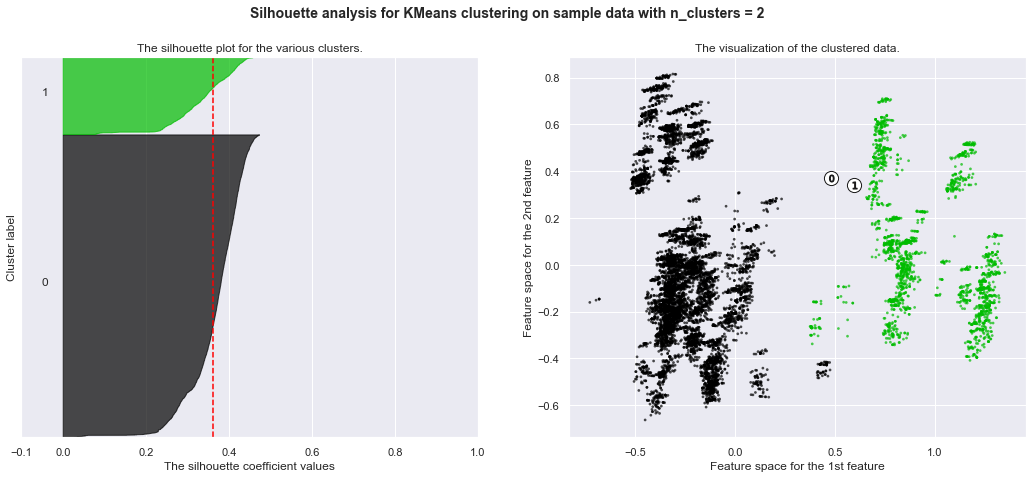

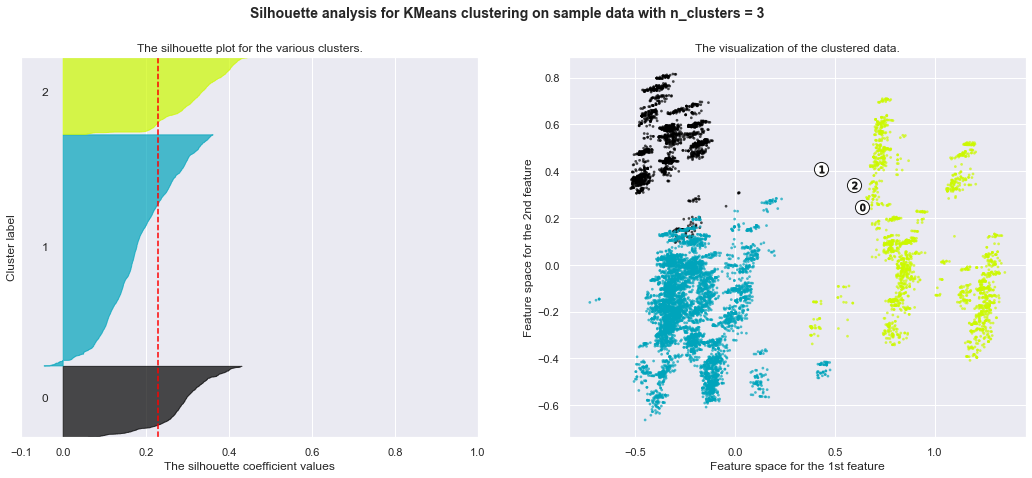

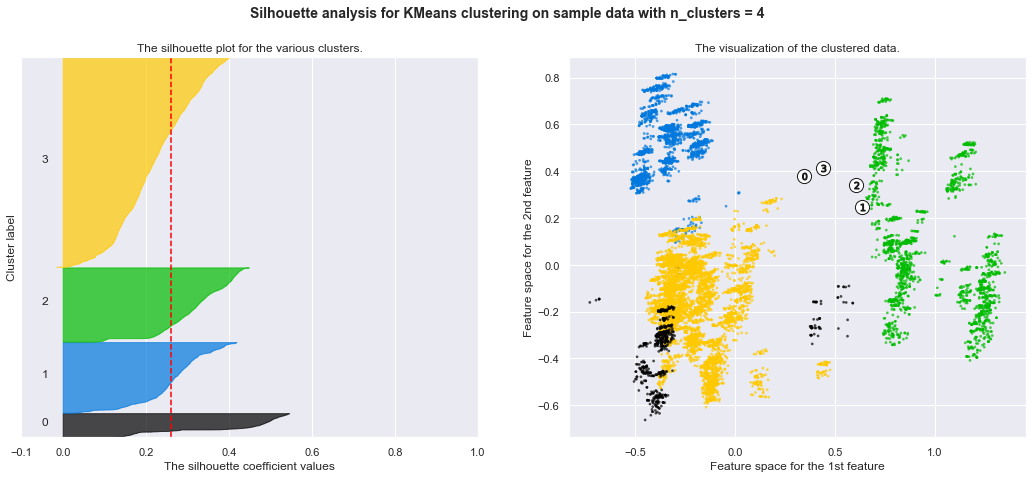

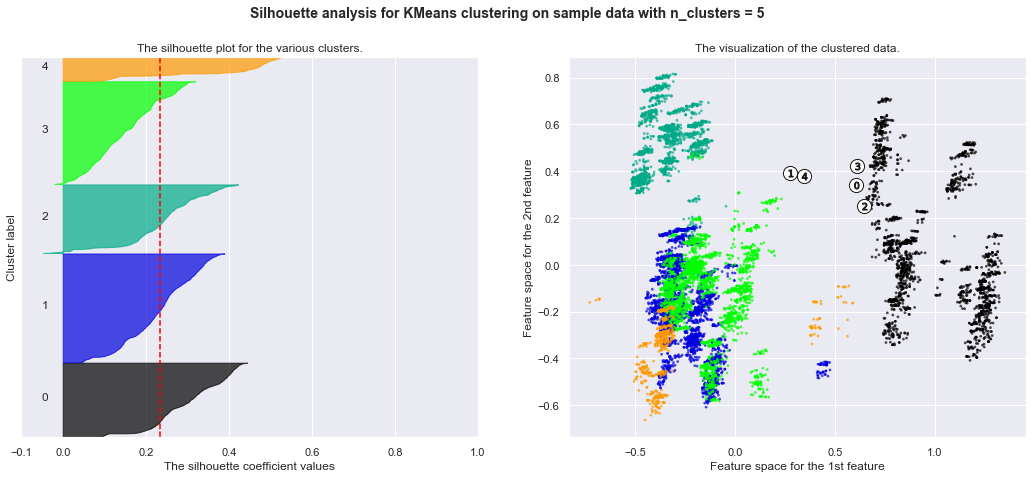

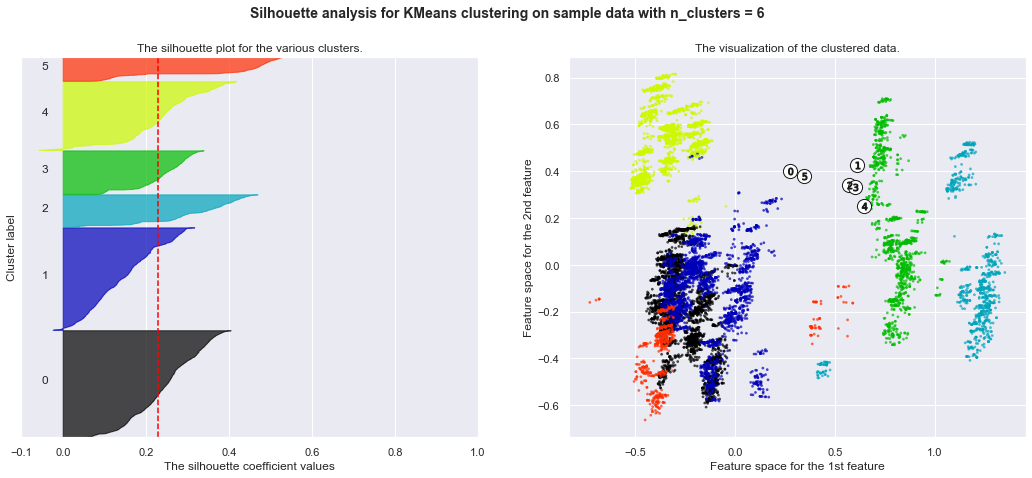

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

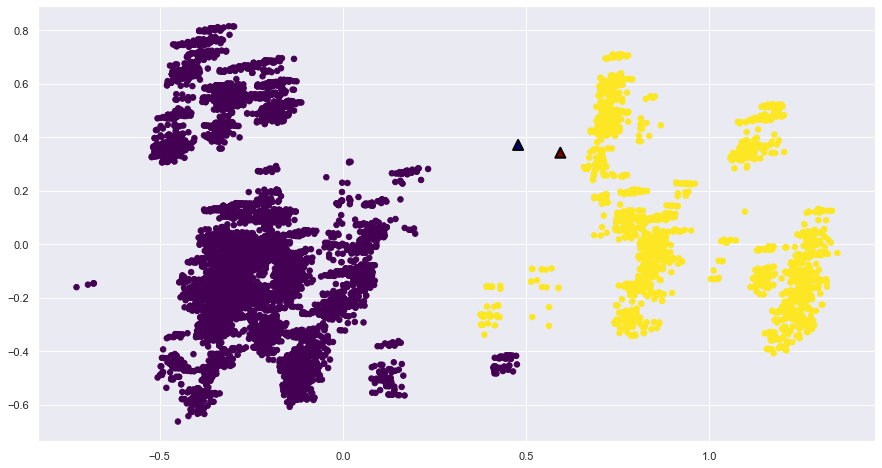

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=123)
labels = kmeans.fit_predict(features_norm)
centers = kmeans.cluster_centers_
labels = kmeans.predict(features_norm)

# plot the cluster assignments and cluster centers
#plt.scatter(scaled_features_copy_temp.iloc[:,0], scaled_features_copy_temp.iloc[:,1], c=y_pred, cmap="jet")
plt.figure(figsize=(15,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0,1],
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")

In [114]:
train_removed_all['Kmeans_cluster']= labels
train_removed_all['dias_ant']= train_labels

<AxesSubplot:>

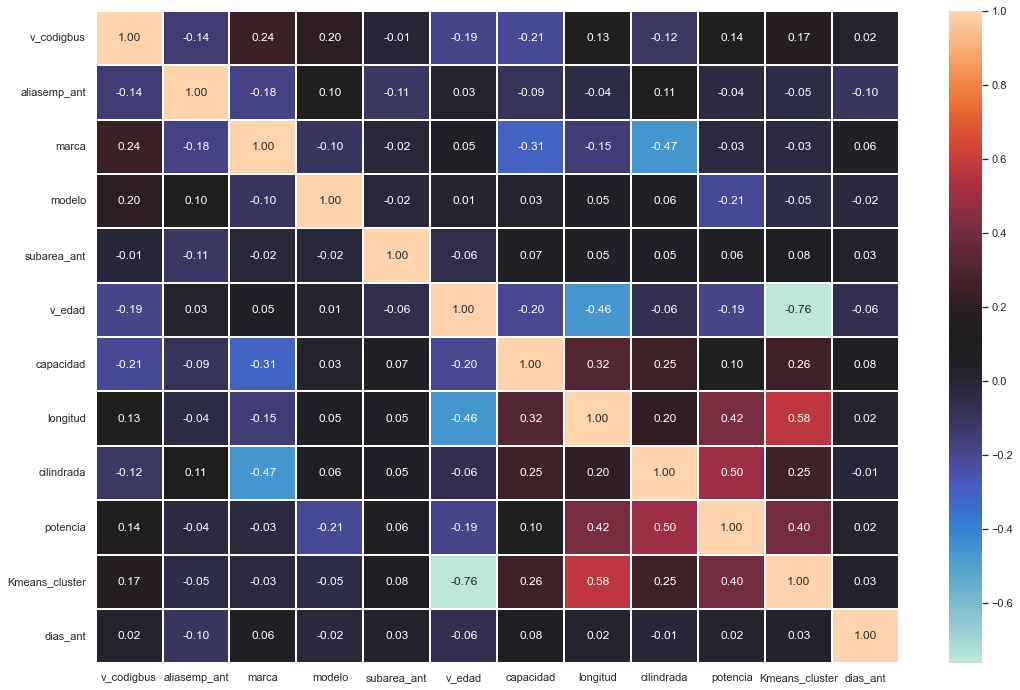

In [115]:
f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(train_removed_all.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones.png')

In [116]:
train_removed_all.columns

Index(['v_codigbus', 'aliasemp_ant', 'marca', 'modelo', 'subarea_ant',
       'v_edad', 'capacidad', 'longitud', 'cilindrada', 'potencia',
       'Kmeans_cluster', 'dias_ant'],
      dtype='object')

In [117]:

features=['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'Kmeans_cluster','dias_ant']
#features=['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
 #      'capacidad', 'Kmeans_cluster', 'ndias_ant_subarea','dias_ant']
            
new_df=train_removed_all[features]


<AxesSubplot:>

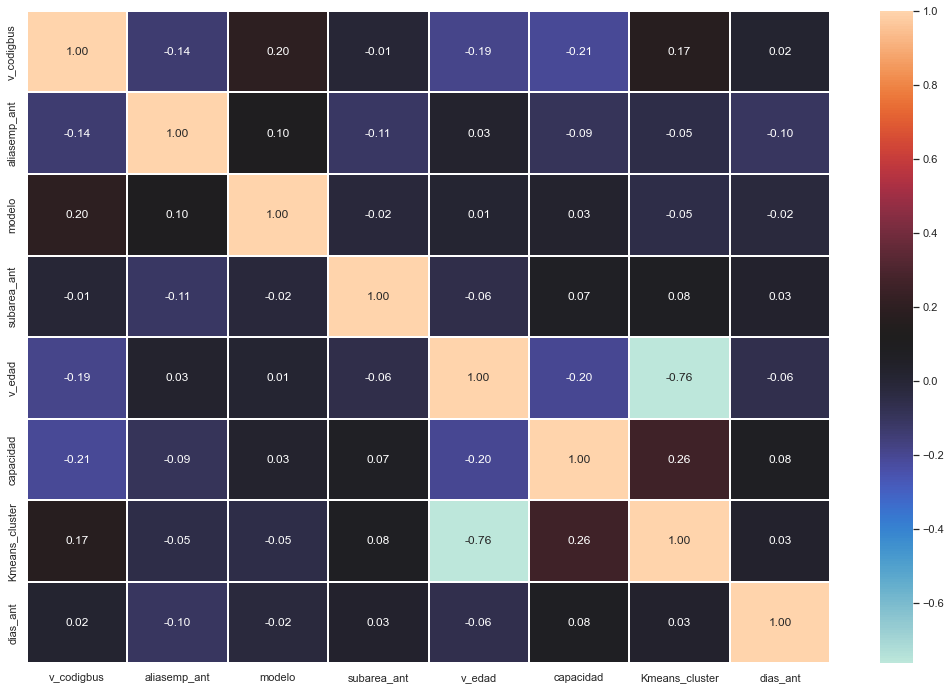

In [118]:
#Transformaciones
import math


#new_df['ndias_ant_subarea_2']=np.sqrt((new_df['ndias_ant_subarea']))
#new_df['subarea_ant_2']=1/((new_df['subarea_ant']))
#new_df['dias_ant_2']=np.sqrt((new_df['dias_ant']))
#new_df['aliasemp_ant_2']=((new_df['aliasemp_ant']))
#new_df['capacidad_2']=((new_df['capacidad'])**3)




f,ax=plt.subplots(figsize=(18,12))
plt.yticks(rotation=90)
sns.heatmap(new_df.corr(),annot=True,linewidths=.10,fmt='.2f',cmap='icefire', ax=ax)#cmap='YlGnBu', ax=ax)
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Correlaciones2.png')

In [119]:
round(new_df.isna().sum() * 100 / len(new_df),2)

v_codigbus        0.0
aliasemp_ant      0.0
modelo            0.0
subarea_ant       0.0
v_edad            0.0
capacidad         0.0
Kmeans_cluster    0.0
dias_ant          0.0
dtype: float64

In [120]:
new_df.columns

Index(['v_codigbus', 'aliasemp_ant', 'modelo', 'subarea_ant', 'v_edad',
       'capacidad', 'Kmeans_cluster', 'dias_ant'],
      dtype='object')

In [121]:
#features_ndf=['v_codigbus', 'modelo', 'v_edad','Kmeans_cluster','subarea_ant_2', 
 #             'dias_ant_2', 'aliasemp_ant_2','capacidad_2','ndias_ant_subarea_2']

newdf=new_df

In [122]:

X_train, X_test, y_train, y_test = train_test_split(
                                        newdf.drop(columns = 'dias_ant'),
                                        newdf['dias_ant'],
                                        test_size=0.25,
                                        random_state = 123
                                    )



# Modelado

In [123]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer,accuracy_score, roc_auc_score, mean_absolute_error, mean_squared_error,r2_score

#‘neg_mean_absolute_error’
#‘neg_mean_squared_error’
#‘neg_root_mean_squared_error’

## Iteraciones

In [124]:
iteraciones=10

# LinearRegression

features_LR=['dias_ant_2', 'aliasemp_ant_2','capacidad_2']
X_train_LR=X_train[features_LR]
X_test_LR=X_test[features_LR]

sns.lmplot(x='ndias_ant_subarea_2',y='dias_ant_2',data=newdf,aspect=2,height=6)
plt.xlabel('Dias de la anterior reparacion por subarea')
plt.ylabel('Dias desde la anterior reparación')
plt.title('ndias_ant_subarea_2 Vs dias_ant_2');

### parametros

In [126]:
parameters_LR={'fit_intercept':[True],
               'normalize':[True,False],
               'copy_X':[True],
               'n_jobs':[-1],
               'positive':[False]
            }

In [127]:
LR=LinearRegression()
ran_LR=RandomizedSearchCV(LR,parameters_LR,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_LR.fit(X_train,y_train)

C:\Users\Dani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [True], 'n_jobs': [-1],
                                        'normalize': [True, False],
                                        'positive': [False]},
                   random_state=0, scoring='neg_mean_absolute_error',
                   verbose=1)

In [128]:
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))
print("CV score=%0.3f" % ran_LR.best_score_)
cv_results_LR = ran_LR.cv_results_

Best parameters from Randomsearch: {'positive': False, 'normalize': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
CV score=-24.259


In [129]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_LR.best_params_))

print('\nLinearRegression \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_LR.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_LR.best_params_
LR_ran = LinearRegression(fit_intercept= model['fit_intercept'],
                          normalize=model['normalize'],
                          copy_X=model['copy_X'],
                          n_jobs=-1,
                          positive=model['positive']
                                )



#Predicción
LR_ran.fit(X_train,y_train)
y_pred = LR_ran.predict(X_test)
mae_LR = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_LR)

r2_LR=r2_score((y_test), (y_pred))#, multioutput='variance_weighted')
print('R2 :%0.4f' %r2_LR+'\n')


print('LinearRegression \n')
#print(r2_score(y_test, y_pred))
print('\n')

# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
#theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X_train.columns.values)
#parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns})

sk_theta = [LR_ran.intercept_]+list(LR_ran.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
print(parameter_df)




mse_LR = mean_squared_error(y_pred, y_test)

# R_square
R_square_LR = LR_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_LR)
print('\nR square obtain for scikit learn library is :',R_square_LR)

#importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': LR_ran.feature_importances_})

#print('Importancia LinearRegression:\n ',importancia)
#print('\n')
#plt.suptitle('Importancia LinearRegression ')
#x=parameter_df.columns
#y=parameter_df.Sklearn_theta
#my_color = np.where(y>=0.1, 'orange', 'skyblue')
#plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_LR = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

DIAS ANT
RandomSearch

Best parameters from Randomsearch: {'positive': False, 'normalize': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}

LinearRegression 

TRAIN 
Best score MAE=-24.2589


PREDICCIÓN  

MAE prediction:  24.774885973317154
R2 :0.0125

LinearRegression 



  Parameter          Columns  Sklearn_theta
0   theta_0  intersect:x_0=1      34.328982
1   theta_1       v_codigbus       0.027976
2   theta_2     aliasemp_ant      -0.417159
3   theta_3           modelo      -0.121116
4   theta_4      subarea_ant       0.109337
5   theta_5           v_edad      -4.764716
6   theta_6        capacidad       3.774300
7   theta_7   Kmeans_cluster      -9.475502

The Mean Square Error(MSE) or J(theta) is:  2727.2942897733296

R square obtain for scikit learn library is : 0.012467835746953204


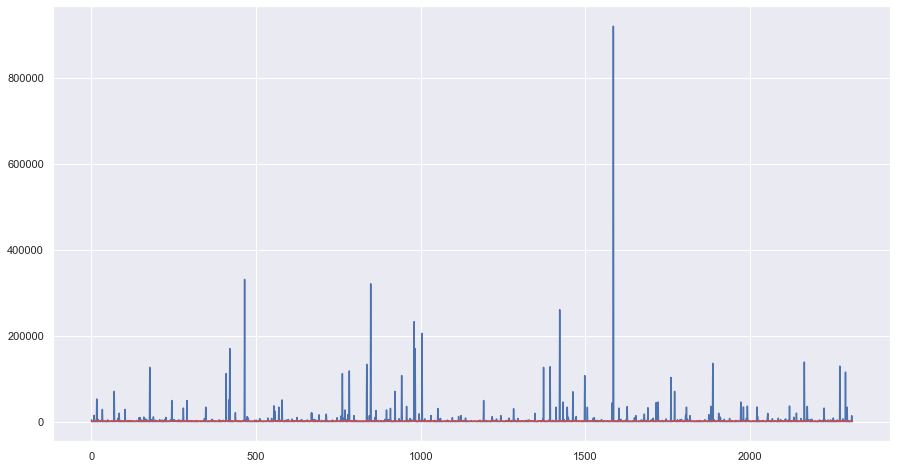

In [131]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_LR.Real)), output_LR.Real, '-b',label='Actual')
ax.plot(range(len(output_LR.Predicho)), output_LR.Predicho, 'r', label='Predicted')
plt.show()

# DecisionTreeRegressor

In [137]:
iteraciones=1000

### parametros

In [138]:
parameters_DT={#'splitter': ['best', 'random'],
               'criterion':['mae'],
               'max_depth': np.arange(2,100,1), 
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(3,11,1),
               #'min_weight_fraction_leaf': np.arange(0.0,0.5,0.1),
               'max_features':['auto', 'sqrt', 'log2'],
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               #'ccp_alpha':np.arange(0.0,1,0.1)
              
            }

In [139]:
DT=DecisionTreeRegressor(random_state=0)
ran_DT=RandomizedSearchCV(DT,parameters_DT,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_DT.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


KeyboardInterrupt: 

In [ ]:
print("Best parameters from Randomsearch: {}".format(ran_DT.best_params_))
print("CV score=%0.3f" % ran_DT.best_score_)
cv_results = ran_DT.cv_results_

In [ ]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_DT.best_params_))

print('\nDecisionTreeRegressor \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_DT.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_DT.best_params_
DT_ran = DecisionTreeRegressor(random_state=0,
                          criterion= model['criterion'],
                          #splitter=model['splitter'],
                          max_depth=model['max_depth'],
                          min_samples_leaf=model['min_samples_leaf'],
                          min_samples_split=model['min_samples_split'],
                          #min_weight_fraction_leaf=model['min_weight_fraction_leaf'],
                          max_features=model['max_features'],
                          #min_impurity_decrease=model['min_impurity_decrease'],
                          #ccp_alpha=model['ccp_alpha']
                                )




#Predicción
DT_ran.fit(X_train,y_train)
y_pred = DT_ran.predict(X_test)
mae_DT = mean_absolute_error(y_test, y_pred)
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_DT)

r2_DT=r2_score(y_test, y_pred)#, multioutput='variance_weighted')
print('R2 :%0.4f' %r2_DT+'\n')


mse_DT = mean_squared_error(y_pred, y_test)

# R_square
R_square_DT = DT_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_DT)
print('\nR square obtain for scikit learn library is :',R_square_DT)   

print('\nDecisionTreeRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': DT_ran.feature_importances_})

print('Importancia DecisionTreeRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia DecisionTreeRegressor ')
x=X_test.columns
y=DT_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_DT = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_DT.Real)), output_DT.Real, '-b',label='Actual')
ax.plot(range(len(output_DT.Predicho)), output_DT.Predicho, 'r', label='Predicted')
plt.show()

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_ran, 
                   feature_names=X_test.columns,  
                   class_names=y_test,
                   filled=True,
                   max_depth=2
                  )

In [ ]:
text_representation = tree.export_text(DT_ran)
#r = export_text(decision_tree, feature_names=iris['feature_names'])
print(text_representation)

# RandomForestRegressor

In [ ]:
iteraciones=5000

### Parametros

In [ ]:
parameters_RF={'bootstrap': [True],
               'criterion':['mae'],
               'max_depth': np.arange(2,50,1), 
               'min_samples_leaf': np.arange(2,5,1),
               'min_samples_split':  np.arange(2,5,1),
               'max_features':['auto', 'sqrt', 'log2'],
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               'n_estimators':np.arange(50,100,1),
               #'oob_score':[True, False],
               #'ccp_alpha':np.arange(0.0,1,0.1)
               
            }

In [ ]:
RF=RandomForestRegressor(random_state=0)
ran_RF=RandomizedSearchCV(RF,parameters_RF,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_RF.fit(X_train,y_train)

In [ ]:
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))
print("CV score=%0.3f" % ran_RF.best_score_)
cv_results = ran_RF.cv_results_

In [ ]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_RF.best_params_))

print('\nRandomForestRegressorr \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_RF.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_RF.best_params_
RF_ran = RandomForestRegressor(random_state=0,
                          criterion= model['criterion'],
                          bootstrap=model['bootstrap'],
                          max_depth=model['max_depth'],
                          min_samples_leaf=model['min_samples_leaf'],
                          min_samples_split=model['min_samples_split'],
                          n_estimators=model['n_estimators'],
                          max_features=model['max_features'],
                          #min_impurity_decrease=model['min_impurity_decrease'],
                          #oob_score=model['oob_score'],     
                          #ccp_alpha=model['ccp_alpha']
                              )



#Predicción
RF_ran.fit(X_train,y_train)
y_pred = RF_ran.predict(X_test)
mae_RF = mean_absolute_error(y_test, y_pred)
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_RF)

r2_RF=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_RF+'\n')

mse_RF = mean_squared_error(y_pred, y_test)

# R_square
R_square_RF = RF_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_RF)
print('\nR square obtain for scikit learn library is :',R_square_RF)  



print('\nRandomForestRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': RF_ran.feature_importances_})

print('Importancia RandomForestRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia RandomForestRegressor ')
x=X_test.columns
y=RF_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_RF = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_RF.Real)), output_RF.Real, '-b',label='Actual')
ax.plot(range(len(output_RF.Predicho)), output_RF.Predicho, 'r', label='Predicted')
plt.show()

# AdaBoostRegressor

In [ ]:
iteraciones=10

### Parametros

In [ ]:
parameters_AB={'base_estimator': [RF_ran],# DT_ran],
               'n_estimators':np.arange(40,100,1),
               'learning_rate':np.arange(0.1,1,0.1),
               'loss':['linear', 'square', 'exponential'] 
            }

In [ ]:
AB=AdaBoostRegressor(random_state=0)
ran_AB=RandomizedSearchCV(AB,parameters_AB,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_AB.fit(X_train,y_train)

In [ ]:
print("Best parameters from Randomsearch: {}".format(ran_AB.best_params_))
print("CV score=%0.3f" % ran_AB.best_score_)
cv_results = ran_AB.cv_results_

In [ ]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_AB.best_params_))

print('\nAdaBoostRegressor \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_AB.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_AB.best_params_
AB_ran = AdaBoostRegressor(random_state=0,
                          base_estimator= model['base_estimator'],
                          n_estimators=model['n_estimators'],
                          learning_rate=model['learning_rate'],
                          loss=model['loss']
                              )



#Predicción
AB_ran.fit(X_train,y_train)
y_pred = AB_ran.predict(X_test)
mae_AB = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_AB)

r2_AB=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_AB+'\n')

mse_AB = mean_squared_error(y_pred, y_test)

# R_square
R_square_AB = AB_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_AB)
print('\nR square obtain for scikit learn library is :',R_square_AB)  



print('\nAdaBoostRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': AB_ran.feature_importances_})

print('Importancia AdaBoostRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia AdaBoostRegressor ')
x=X_test.columns
y=AB_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_AB = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_AB.Real)), output_AB.Real, '-b',label='Actual')
ax.plot(range(len(output_AB.Predicho)), output_AB.Predicho, 'r', label='Predicted')
plt.show()

# GradientBoostingRegressor

In [ ]:
iteraciones=10

### Parametros

In [ ]:
parameters_GB={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'], 
               'learning_rate':np.arange(0.1,2,0.1),
               'n_estimators':np.arange(10,150,1), 
               #'subsample':np.arange(0.1,2,0.1),
               'criterion':['mae'],
               'min_samples_split':  np.arange(2,11,1),
               'min_samples_leaf': np.arange(1,5,1),
               #'min_weight_fraction_leaf':np.arange(0.0,1,0.1),
               'max_depth': np.arange(2,50,1),
               #'min_impurity_decrease':np.arange(0.0,1,0.1),
               #'init':[None],
               'max_features':['auto', 'sqrt', 'log2'],
               #'alpha':np.arange(0.1,1.5,0.1),
               #'ccp_alpha':np.arange(0.0,1,0.1)
            }

In [ ]:
GB=GradientBoostingRegressor(random_state=0)
ran_GB=RandomizedSearchCV(GB,parameters_GB,cv=5,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1,random_state=0,n_iter=iteraciones) 
ran_GB.fit(X_train,y_train)

In [ ]:
print("Best parameters from Randomsearch: {}".format(ran_GB.best_params_))
print("CV score=%0.3f" % ran_GB.best_score_)
cv_results = ran_GB.cv_results_

In [ ]:
# constructor RandomSearch
print(target.upper()+'\n'+'RandomSearch'+'\n')
print("Best parameters from Randomsearch: {}".format(ran_GB.best_params_))

print('\nAdaBoostRegressor \n\nTRAIN ')
print("Best score MAE=%0.4f" % ran_GB.best_score_)
print('\n')
from sklearn.inspection import permutation_importance


model=ran_GB.best_params_
GB_ran = GradientBoostingRegressor(random_state=0,
                          loss= model['loss'],
                          learning_rate=model['learning_rate'],
                          n_estimators=model['n_estimators'],
                          #subsample=model['subsample'],
                          criterion=model['criterion'],
                          min_samples_split=model['min_samples_split'],
                          min_samples_leaf=model['min_samples_leaf'],
                          max_depth=model['max_depth'],
                          max_features=model['max_features']
                              )






#Predicción
GB_ran.fit(X_train,y_train)
y_pred = GB_ran.predict(X_test)
mae_GB = mean_absolute_error((y_test), (y_pred))
print ('PREDICCIÓN  \n')
print ('MAE prediction: ', mae_GB)

r2_GB=r2_score(y_test, y_pred)#, multioutput='variance_weighted')

print('R2 :%0.4f' %r2_GB+'\n')


mse_GB = mean_squared_error(y_pred, y_test)

# R_square
R_square_GB = GB_ran.score(X_test,y_test)
print('\nThe Mean Square Error(MSE) or J(theta) is: ',mse_GB)
print('\nR square obtain for scikit learn library is :',R_square_GB)  


print('\nGradientBoostingRegressor \n')
#print(r2_score(y_test, y_pred))
print('\n')
importancia=pd.DataFrame({ 'feature': X_test.columns,'importancia': GB_ran.feature_importances_})

print('Importancia GradientBoostingRegressor:\n ',importancia)
print('\n')
plt.suptitle('Importancia GradientBoostingRegressor ')
x=X_test.columns
y=GB_ran.feature_importances_
my_color = np.where(y>=0.1, 'orange', 'skyblue')
plt.barh(x, y,color=my_color)


#plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
#plt.scatter(x, y, color=my_color, s=1, alpha=1)


#Salida
#plt.savefig(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
output_GB = pd.DataFrame({ 'date': X_test.index,'Real': (y_test**2), 'Predicho': (y_pred**2)})

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(range(len(output_GB.Real)), output_GB.Real, '-b',label='Actual')
ax.plot(range(len(output_GB.Predicho)), output_GB.Predicho, 'r', label='Predicted')
plt.show()

In [ ]:
target= 'motor'

In [ ]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'TERMINADO'+'\n')

             
            
         #     'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
        #      'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+           
       #       'RandomSearch Random Forest: '+'\n\n'+
      #        'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
     #         'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
    #          'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
   #           'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
  #            'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
 #             '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
#              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

In [ ]:
# NOTIFICACIÓN DE PROCESO TERMINADO RandomSearch
import requests
import vlc
from datetime import datetime
now = datetime.now()
fecha=('Fecha: '+str(now.day)+'-'+str(now.month)+'-'+str(now.year)+' Hora: '+str(now.hour)+':'+str(now.minute))

idBot = '5018694182:AAFfuyvlA9S8JJgrJ0WbUJlwSHz_tFluCI8'
idGrupo = '-743732742'

def enviarMensaje(mensaje):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendMessage',
              data={'chat_id': idGrupo, 'text': mensaje, 'parse_mode': 'HTML'})

def enviarDocumento(ruta):
    requests.post('https://api.telegram.org/bot' + idBot + '/sendDocument',
              files={'document': (ruta, open(ruta, 'rb'))},
              data={'chat_id': idGrupo, 'caption': 'imagen caption'})
    
enviarMensaje(target.upper()+'\n'+fecha+'\n'+'SCORE'+'\n'+
              'LR \n'+'MAE: %0.4f' % mae_LR+'\n'+ 'MSE: %0.4f' % mse_LR+'\n'+ 'R sqrt: %0.4f' % r2_LR+'\n\n'+
              'DT \n'+'MAE: %0.4f' % mae_DT+'\n'+ 'MSE: %0.4f' % mse_DT+'\n'+ 'R sqrt: %0.4f' % r2_DT+'\n\n'+
              'RF \n'+'MAE: %0.4f' % mae_RF+'\n'+ 'MSE: %0.4f' % mse_RF+'\n'+ 'R sqrt: %0.4f' % r2_RF+'\n\n'+
              'AB \n'+'MAE: %0.4f' % mae_AB+'\n'+ 'MSE: %0.4f' % mse_AB+'\n'+ 'R sqrt: %0.4f' % r2_AB+'\n\n'+
              'GB \n'+'MAE: %0.4f' % mae_GB+'\n'+ 'MSE: %0.4f' % mse_GB+'\n'+ 'R sqrt: %0.4f' % r2_GB+'\n\n') 

             
            
         #     'Features Cluster 0 :\n'+str(list(X_test0.columns))+'\n\n'+
        #      'Features Cluster 1 :\n'+str(list(X_test1.columns))+'\n\n'+           
       #       'RandomSearch Random Forest: '+'\n\n'+
      #        'Cluster 0 \n'+str(ran_rf0.best_params_)+'\n'+'Best Score Cluster 0 :%0.4f' % ran_rf0.best_score_+'\n\n'+
     #         'Cluster 1 \n'+str(ran_rf1.best_params_)+'\n'+'Best Score Cluster 1 :%0.4f' % ran_rf1.best_score_+'\n\n'+
    #          'f1-score Cluster 0: %0.4f' % cr0['accuracy']+'\n'+
   #           'f1-score Cluster 1: %0.4f' % cr1['accuracy']+'\n'+
  #            'f1-score Combinado: %0.4f' % crc['accuracy']+'\n\n'+
 #             '0 No es '+target+' :\n %0.4f ' % crc['0']['f1-score']+'\n'+
#              '1 Es '+target+' :\n %0.4f ' % crc['1']['f1-score'])

#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster0.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\Cluster1.png')
#enviarDocumento(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\plots\importancia.png') 

sound=vlc.MediaPlayer(r'C:\Users\Dani\OneDrive - SOFTOUR SISTEMAS S.L\Data_Science\Prediccion talleres\sounds\wavs_conga_groove.wav')
#sound.play()
print('done')

In [ ]:
print(target.upper()+'\n'+fecha+'\n'+'SCORE'+'\n'+
              'LR \n'+'MAE: %0.4f' % mae_LR+'\n'+ 'MSE: %0.4f' % mse_LR+'\n'+ 'R sqrt: %0.4f' % r2_LR+'\n\n'+
              'DT \n'+'MAE: %0.4f' % mae_DT+'\n'+ 'MSE: %0.4f' % mse_DT+'\n'+ 'R sqrt: %0.4f' % r2_DT+'\n\n'+
              'RF \n'+'MAE: %0.4f' % mae_RF+'\n'+ 'MSE: %0.4f' % mse_RF+'\n'+ 'R sqrt: %0.4f' % r2_RF+'\n\n'+
              'AB \n'+'MAE: %0.4f' % mae_AB+'\n'+ 'MSE: %0.4f' % mse_AB+'\n'+ 'R sqrt: %0.4f' % r2_AB+'\n\n'+
              'GB \n'+'MAE: %0.4f' % mae_GB+'\n'+ 'MSE: %0.4f' % mse_GB+'\n'+ 'R sqrt: %0.4f' % r2_GB+'\n\n') 